# Introduction to computational science: Assignment 2 
### Sanne Donker: 10780416 
### Heleen Oude Nijhuis: 129492936


In [110]:
# Importing libraries and packages
import scipy.integrate
import scipy.optimize

from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.fftpack import fft
import matplotlib as mpl
from __future__ import division
mpl.rcParams['figure.dpi'] = 300
import matplotlib.patches as mpatches

## Functions for Gillespie's method

In [111]:
# Discrete event simulation
def sir_event_demo(y, t, beta, gamma):

    X, Y, Z, N = y
    X_list = [X]
    Y_list = [Y]
    Z_list = [Z]
    N_list = [N]

    time = 0
    time_list = [0]
    # counter = 0
    while time < t:

        # birth, transmission, recovery, death X, death Y, death Z
        rates = [mu * N, beta * X * Y / N, gamma * Y, mu * X, mu * Y, mu * Z]

        dt = []
        for j in range(6):
            u = np.random.uniform(0, 1)
            if rates[j] < 0.0001:
                dt.append(100000)
                # counter += 1
            else:
                dt.append(-np.log(u) / rates[j])

        first_event = dt.index(min(dt))

        if first_event == 0:
            X = X + 1
            N = N + 1

        elif first_event == 1:
            X = X - 1
            Y = Y + 1

        elif first_event == 2:
            Y = Y - 1
            Z = Z + 1

        elif first_event == 3:
            X = X - 1
            N = N -1

        elif first_event == 4:
            Y = Y - 1
            N = N - 1

        else:
            Z = Z - 1
            N = N - 1

        X_list.append(X)
        Y_list.append(Y)
        Z_list.append(Z)
        N_list.append(N)

        time += min(dt)
        time_list.append(time)

    return X_list, Y_list, Z_list, N_list, time_list




# Discrete event simulation
def sir_event_demo_imports(y, t, beta, gamma):

    X, Y, Z, N = y
    X_list = [X]
    Y_list = [Y]
    Z_list = [Z]
    N_list = [N]

    time = 0
    time_list = [0]
    counter = 0
    birth = 0
    transmission = 0
    recovery = 0
    deathX = 0
    deathY = 0
    deathZ = 0
    deathInfected = 0
    imports = 0
    passingthrough = 0
    while time < t:

        # birth, transmission, recovery, death X, death Y, death Z, death while infected
        # import, passing through
        rates = [mu * N, beta * X * Y / N, gamma * Y, mu * X, mu * Y, mu * Z, delta, epsilon * X]

        dt = []
        for j in range(len(rates)):
            u = np.random.uniform(0, 1)
            if rates[j] < 0.0001:
                dt.append(100000)
                counter += 1
            else:
                dt.append(-np.log(u) / rates[j])

        first_event = dt.index(min(dt))
        # print(first_event)

        if first_event == 0:
            X = X + 1
            N = N + 1
            birth += 1

        elif first_event == 1:
            X = X - 1
            Y = Y + 1
            transmission += 1

        elif first_event == 2:
            Y = Y - 1
            Z = Z + 1
            recovery += 1

        elif first_event == 3:
            X = X - 1
            N = N - 1
            deathX += 1

        elif first_event == 4:
            Y = Y - 1
            N = N - 1
            deathY += 1

        elif first_event == 5:
            Z = Z - 1
            N = N - 1
            deathZ += 1

        elif first_event == 6:
            Y = Y + 1
            N = N + 1
            imports += 1

        else:
            X = X - 1
            Y = Y + 1
            passingthrough += 1

        X_list.append(X)
        Y_list.append(Y)
        Z_list.append(Z)
        N_list.append(N)

        time += min(dt)
        time_list.append(time)

    print(birth, transmission, recovery, deathX, deathY, deathZ, imports, passingthrough)
    return X_list, Y_list, Z_list, N_list, time_list




## Variability

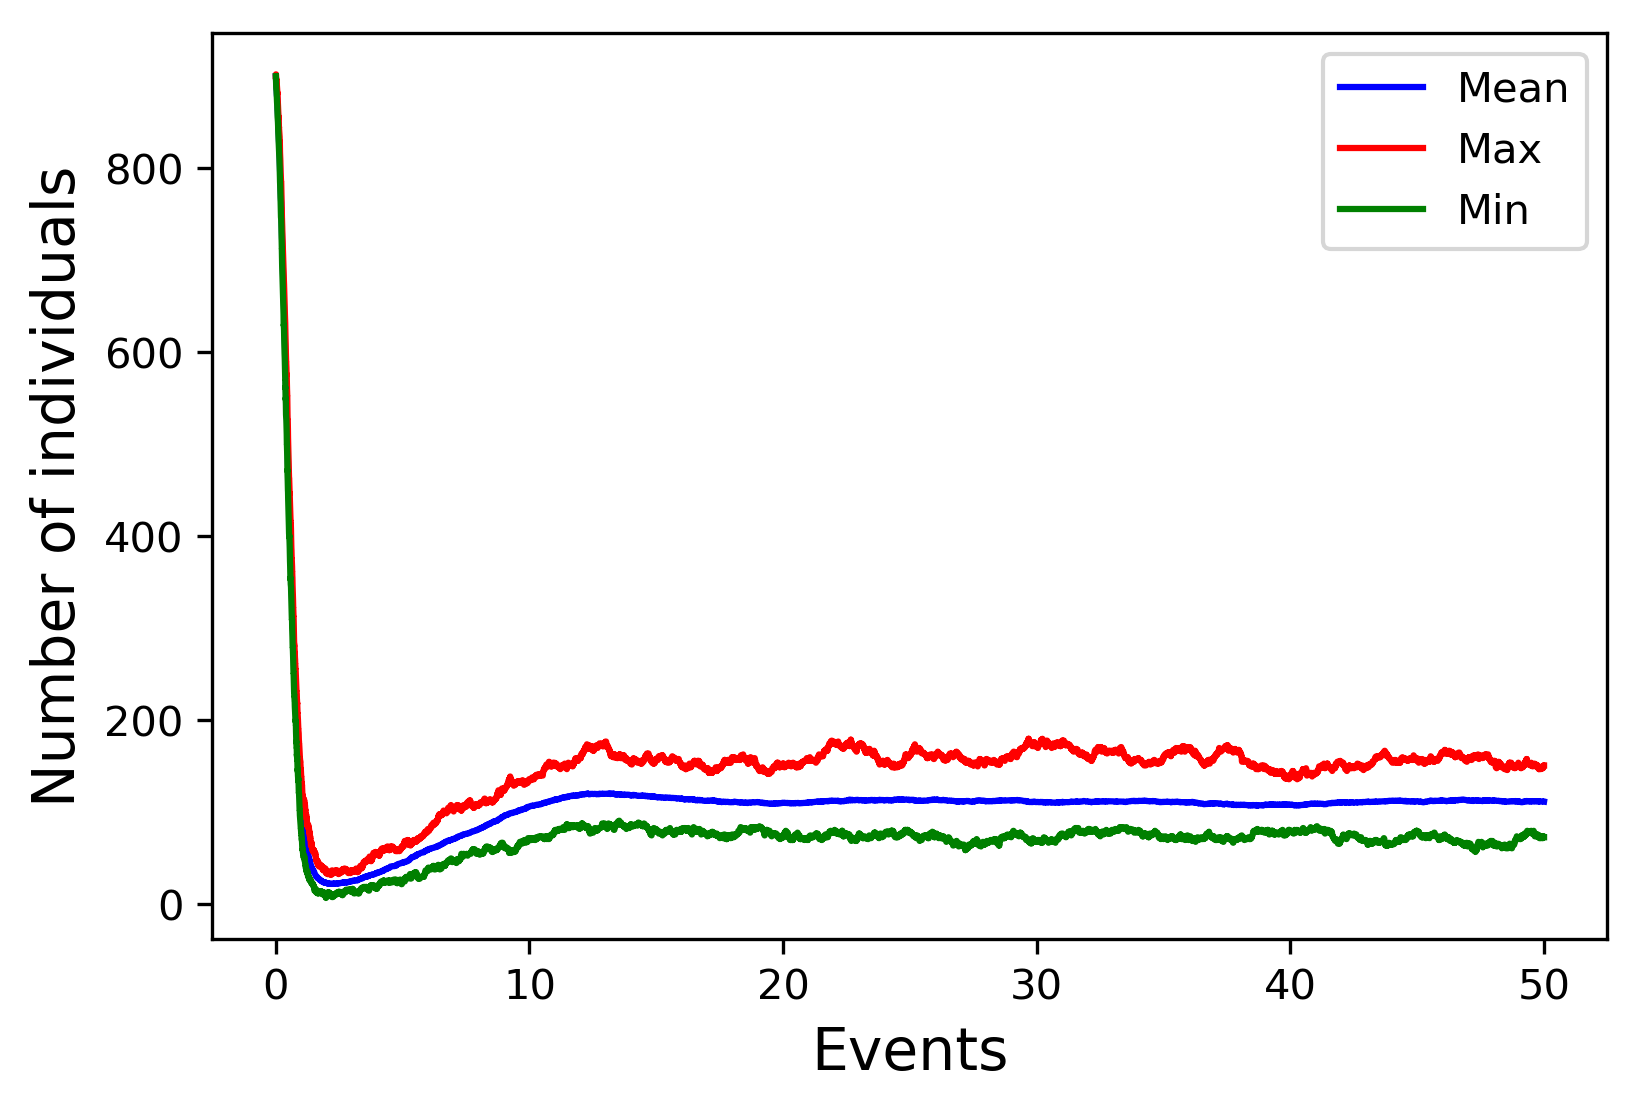

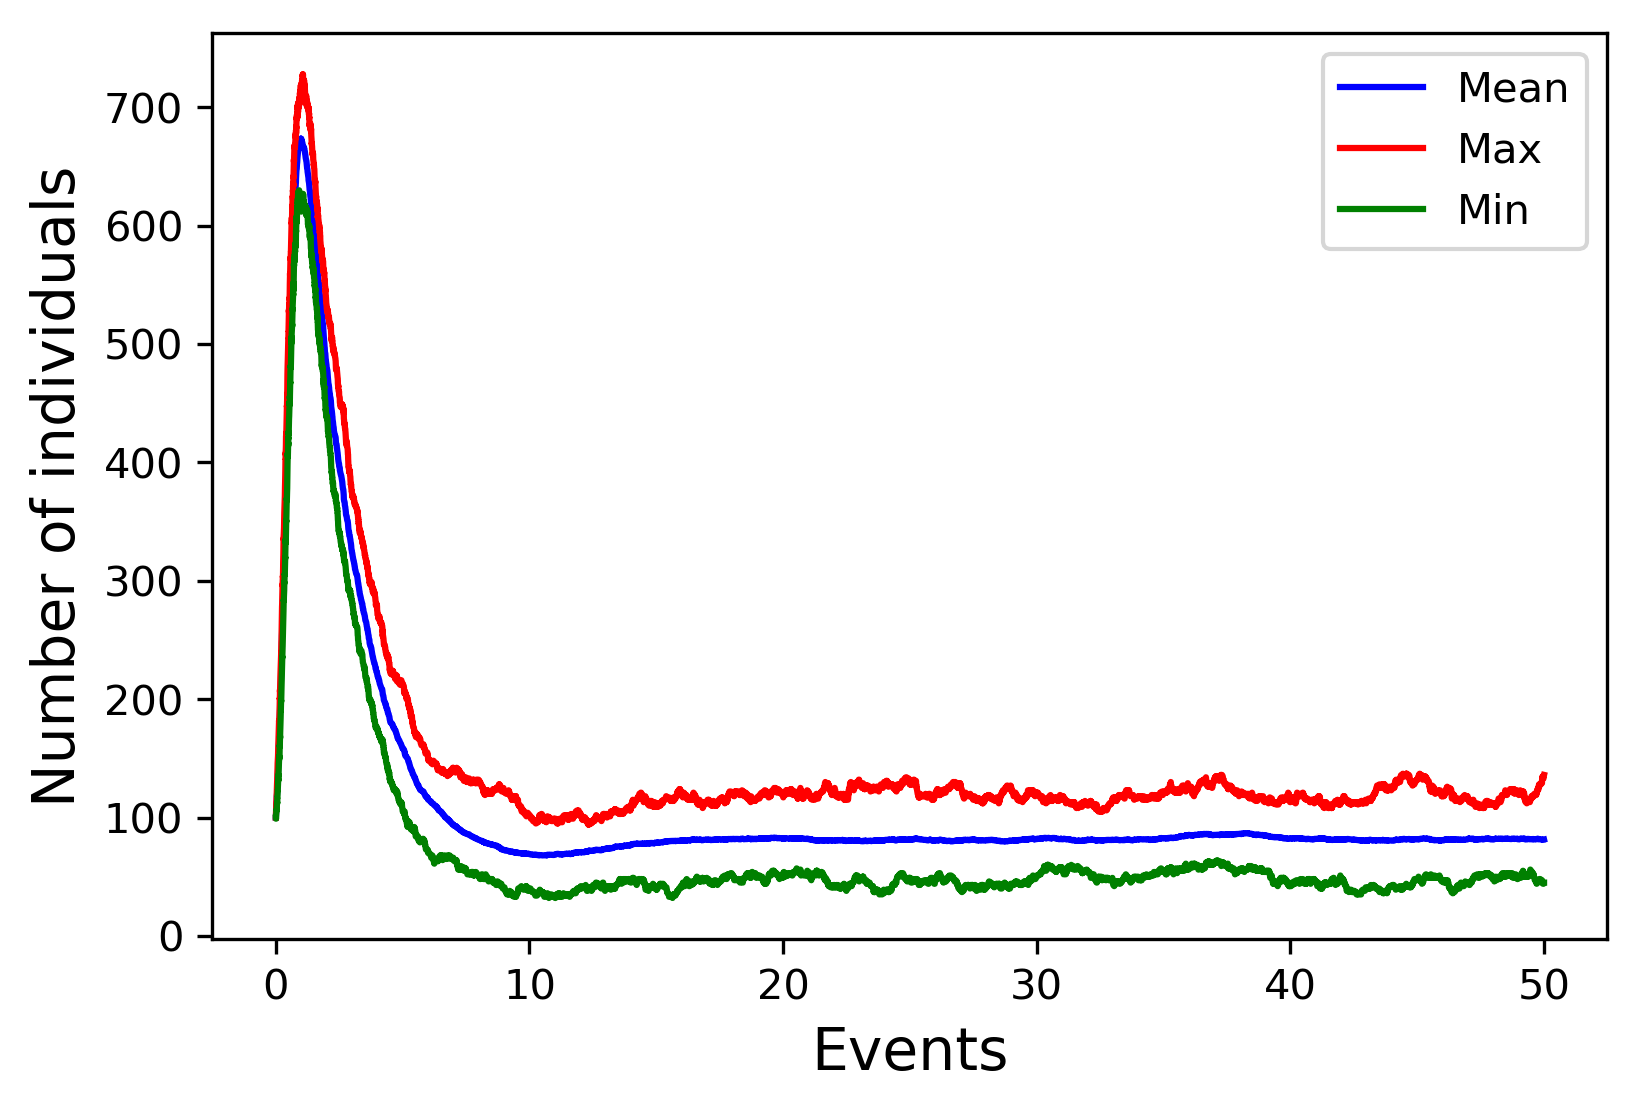

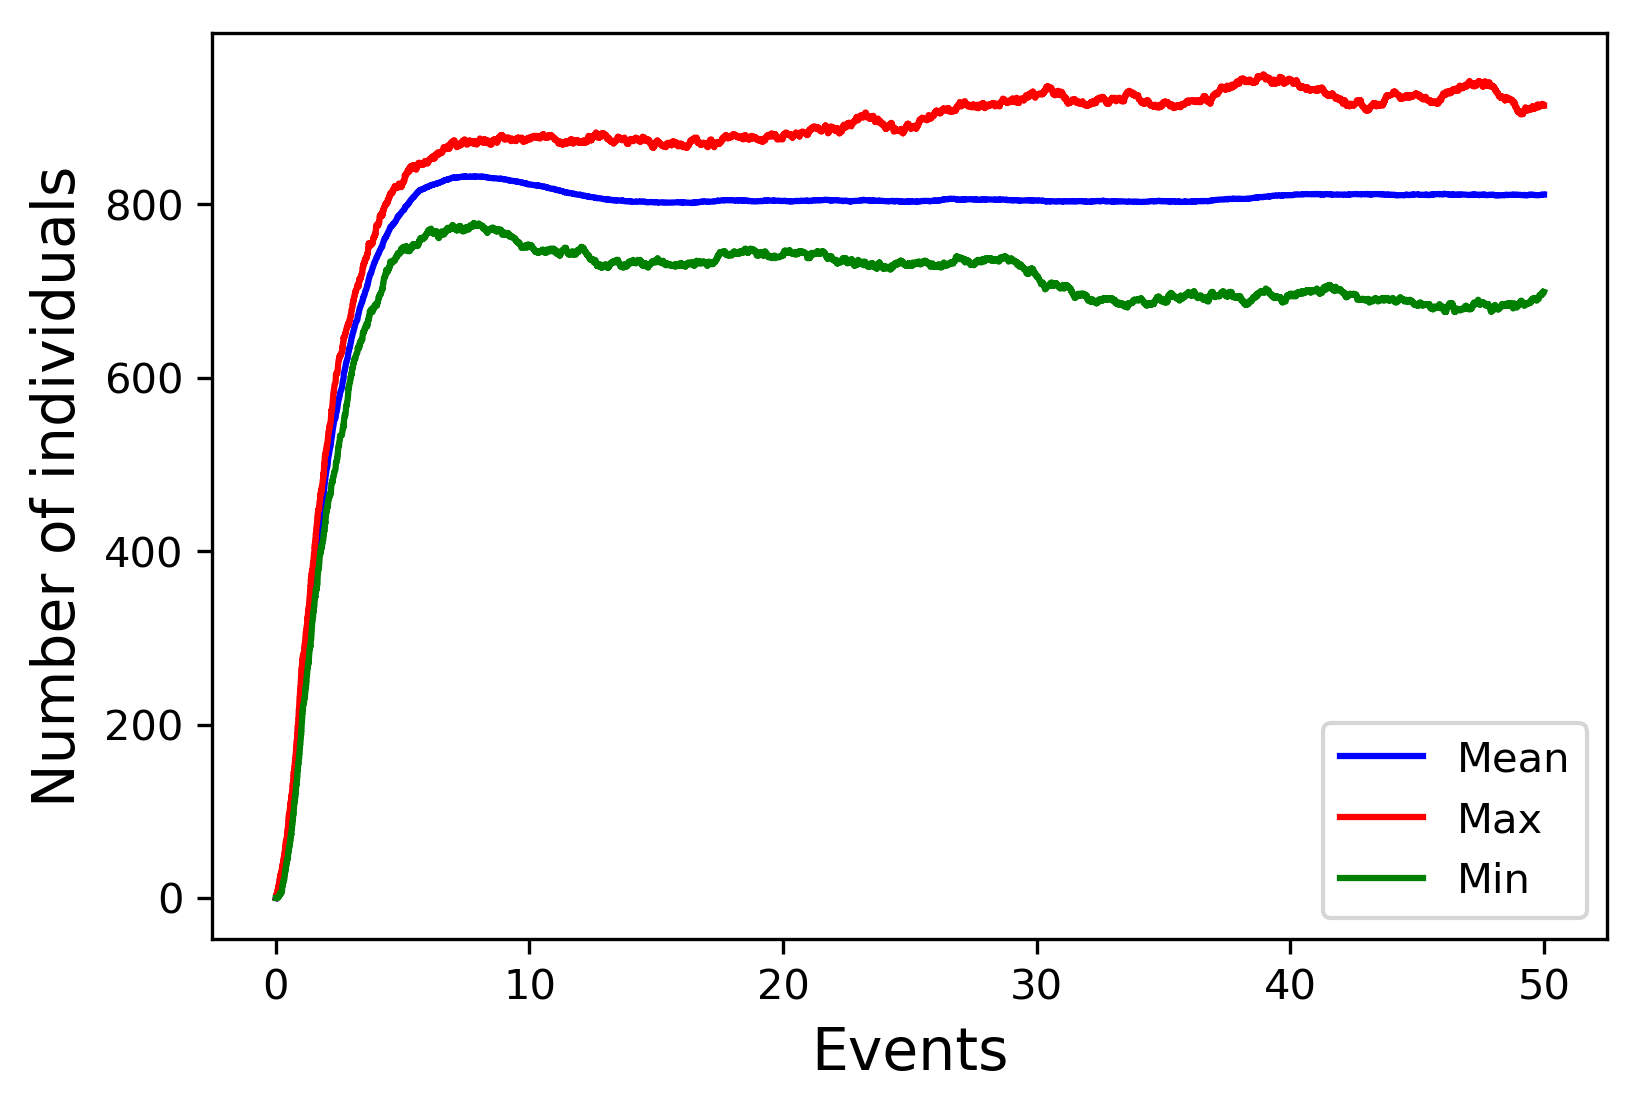

In [112]:

def variability2(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X, Y, Z
    For constant population, if pop not constant uncomment the N_list lines
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    time_list = []
    length_list = []
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    outcomes = [X_list, Y_list, Z_list]
    names = ["Susceptibles.png", "Infecteds.png", "Recovereds.png"]

    # get shortest length
    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)

    # plot for every class
    for k in range(len(outcomes)):

        # save mean, max and min per timestep
        mean_list = []
        max_list = []
        min_list = []
        for i in range(minimum_length):
            timestep = []
            for j in range(runs):
                timestep.append(outcomes[k][j][i])
            mean_list.append(np.mean(timestep))
            max_list.append(max(timestep))
            min_list.append(min(timestep))

        # plot mean, max and min
        mean_line = plt.plot(time_list[index_t], mean_list, 'b', label="Mean")
        max_line = plt.plot(time_list[index_t], max_list, 'r', label="Max")
        min_line = plt.plot(time_list[index_t], min_list, 'g', label="Min")

        plt.xlabel("Events", fontsize=14)
        plt.ylabel("Number of individuals", fontsize=14)
        plt.legend()
        plt.savefig(names[k], dpi=300)
        plt.show()

    # blue = mpatches.Patch(color="b", label="Mean")
    # red = mpatches.Patch(color="r", label="Max")
    # green = mpatches.Patch(color="g", label="Min")
    # plt.legend(handles=[blue, red, green])

    
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0

t = 50
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
variability2(100, y0, t, beta, gamma)


## Co-variance

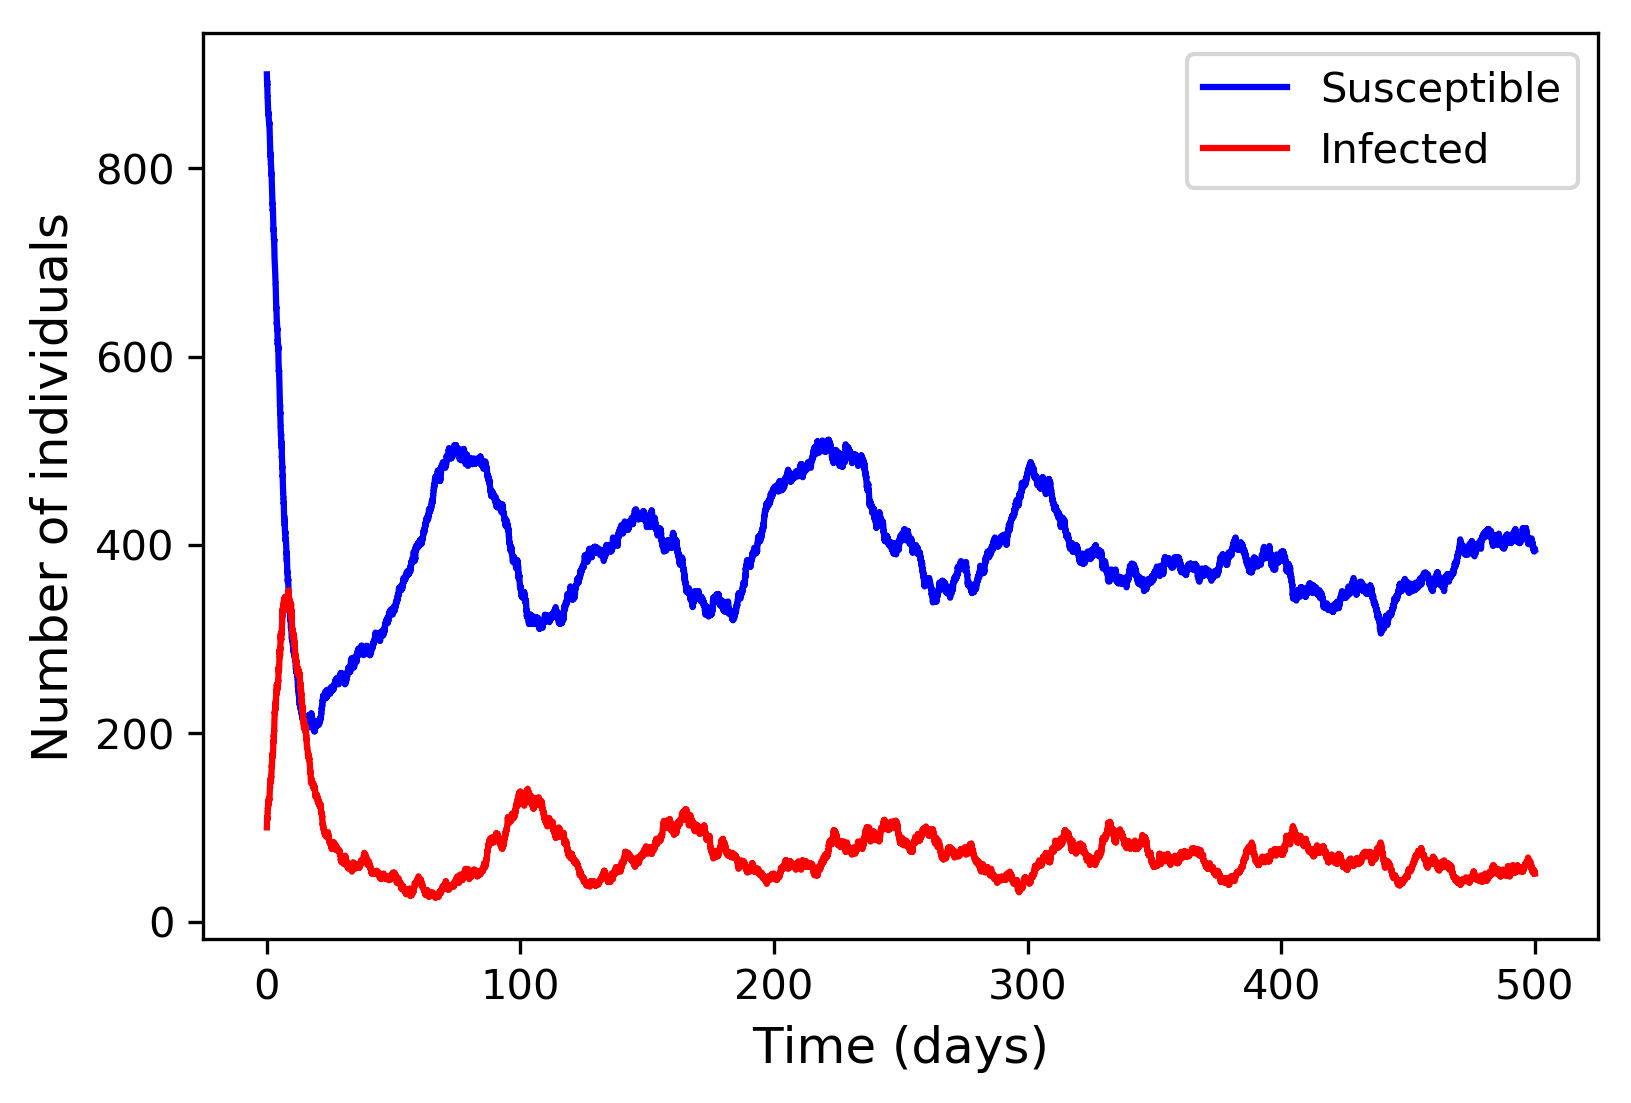

In [97]:
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0

t = 500
beta = 1/2
gamma = 1 /6
mu = 0.02
# rho = 0.3
delta = 0.01
epsilon = 0.001


#Generate solutions
X_det, Y_det, Z_det, N_det, time_list_det = sir_event_demo(y0, t, beta, gamma)

plt.plot(time_list_det, X_det, 'b', label="Susceptible")
plt.plot(time_list_det, Y_det, 'r', label="Infected")
#plt.plot(time_list, Z, 'g', label="Recovered")
#plt.plot(time_list, N, 'y', label="Population")
plt.xlabel("Time (days)", fontsize=12)
plt.ylabel("Number of individuals", fontsize=12)
plt.legend()
plt.show()

(33653, 14902, 13976, 19024, 1394, 13760, 9, 379)
(57006, 25466, 23713, 31188, 2390, 23273, 9, 574)
(46120, 20601, 19253, 25479, 1869, 18824, 7, 484)
(51357, 22650, 21142, 28431, 2162, 20806, 10, 559)
(46668, 20862, 19505, 25808, 1945, 19198, 8, 496)
(38305, 16961, 15920, 21315, 1577, 15489, 4, 454)
(59392, 26859, 25024, 32077, 2519, 24545, 10, 640)
(44699, 20256, 18888, 24369, 1928, 18471, 6, 498)
(50166, 22157, 20735, 27784, 2017, 20330, 8, 530)
(44647, 19879, 18594, 24739, 1890, 18252, 12, 512)
(58091, 26258, 24586, 31531, 2413, 24194, 9, 667)
(47645, 21181, 19737, 26221, 2042, 19399, 17, 508)
(60392, 27113, 25280, 32667, 2541, 24623, 6, 657)
(54930, 24538, 22839, 29947, 2348, 22447, 10, 611)
(81249, 35976, 33456, 44204, 3287, 32480, 13, 827)
(61399, 27690, 25789, 33131, 2659, 25272, 7, 688)
(82854, 36737, 34245, 44884, 3444, 33406, 10, 897)
(68641, 30820, 28680, 37207, 2913, 27978, 9, 731)
(45484, 20400, 19047, 25034, 1906, 18677, 7, 466)
(47478, 21860, 20393, 25547, 2075, 19974, 1

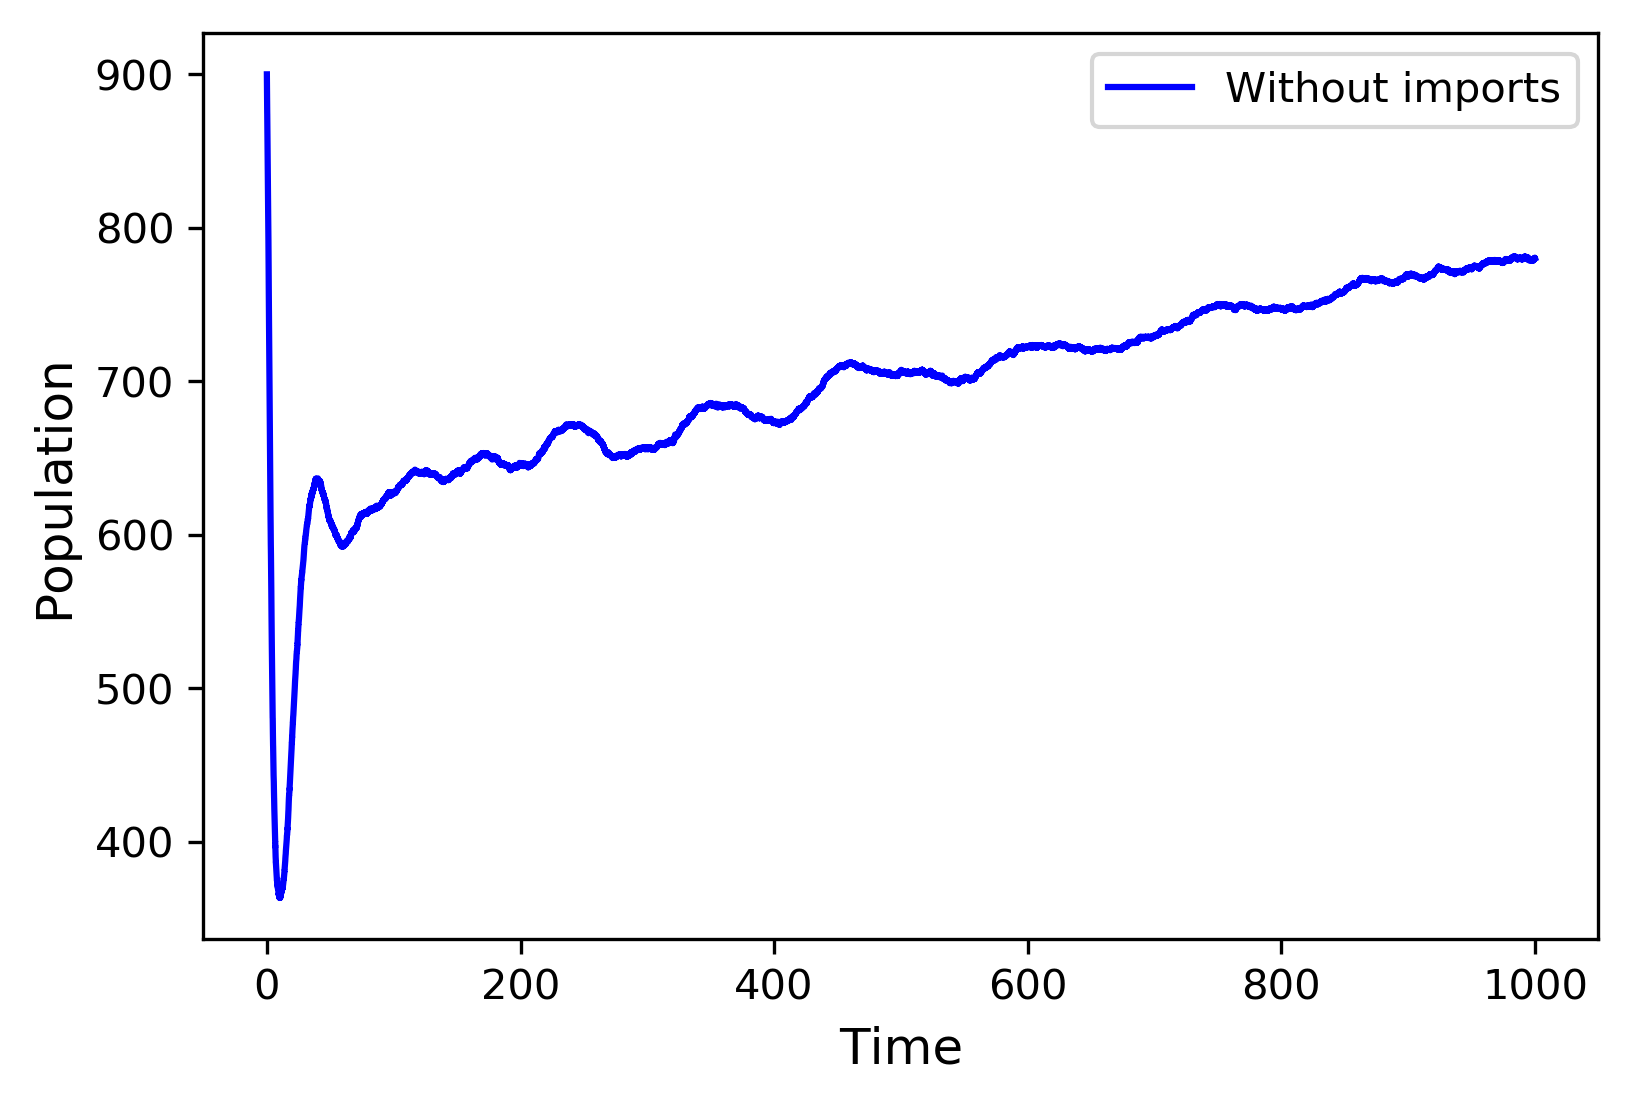

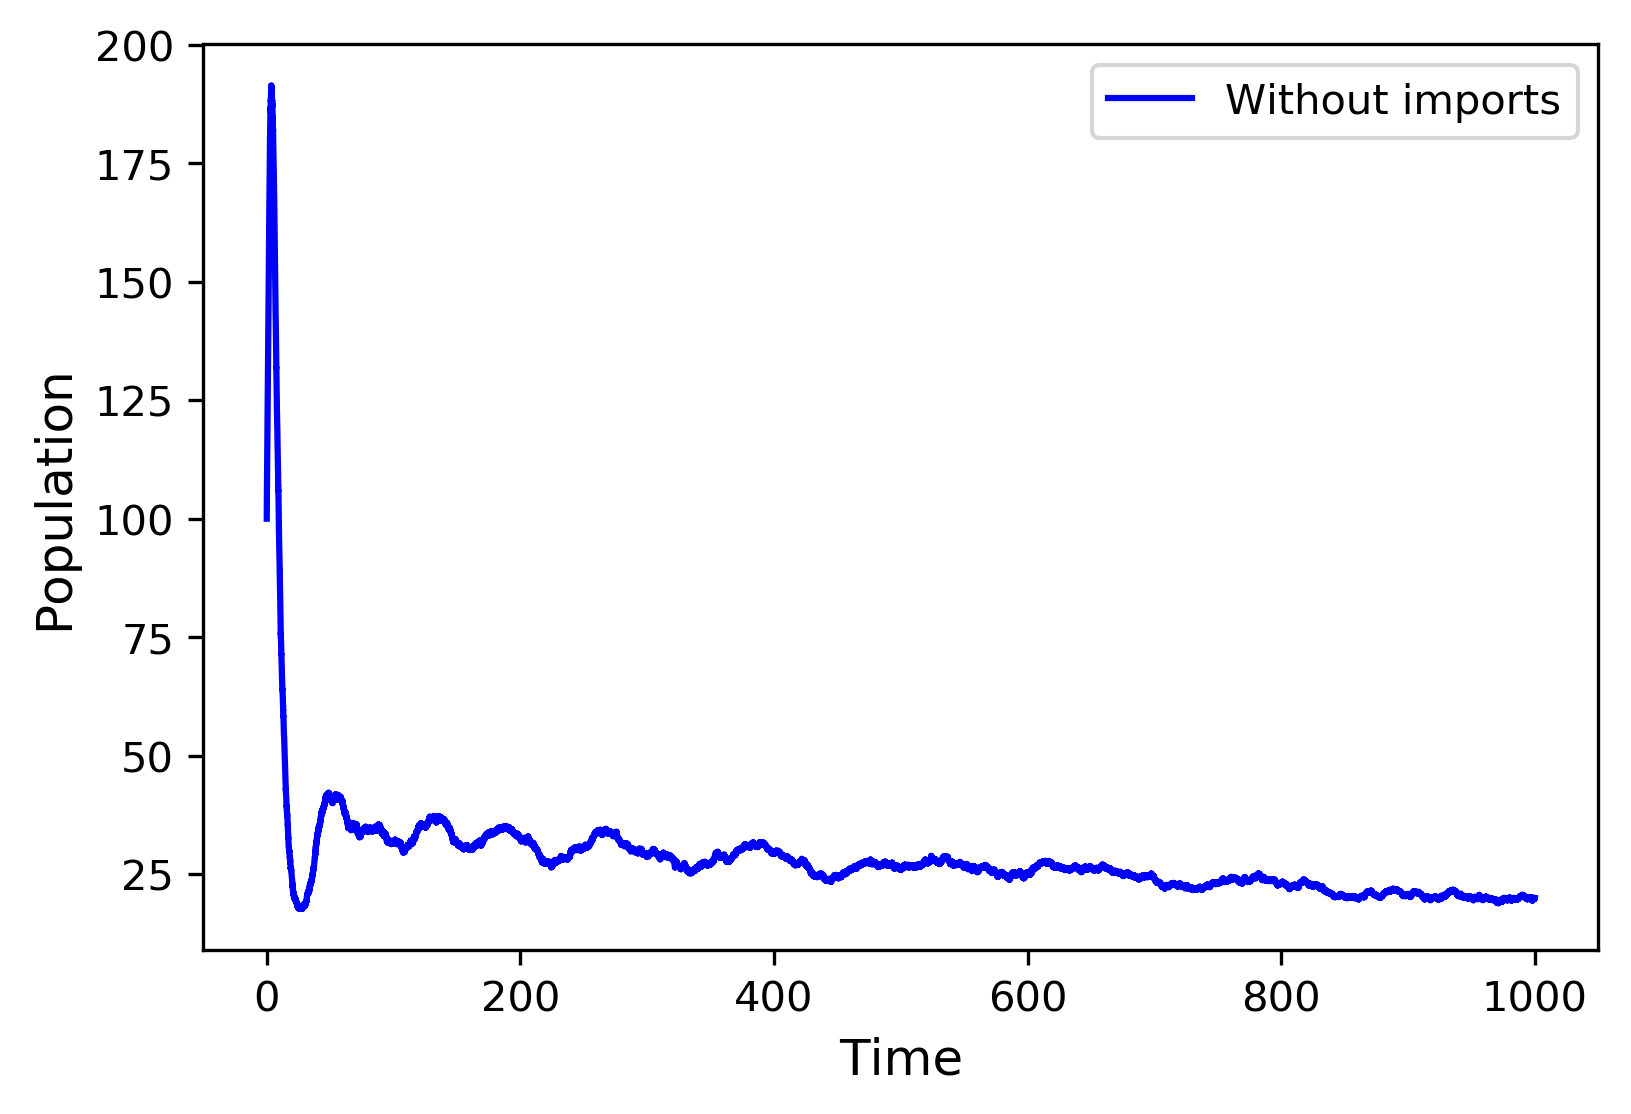

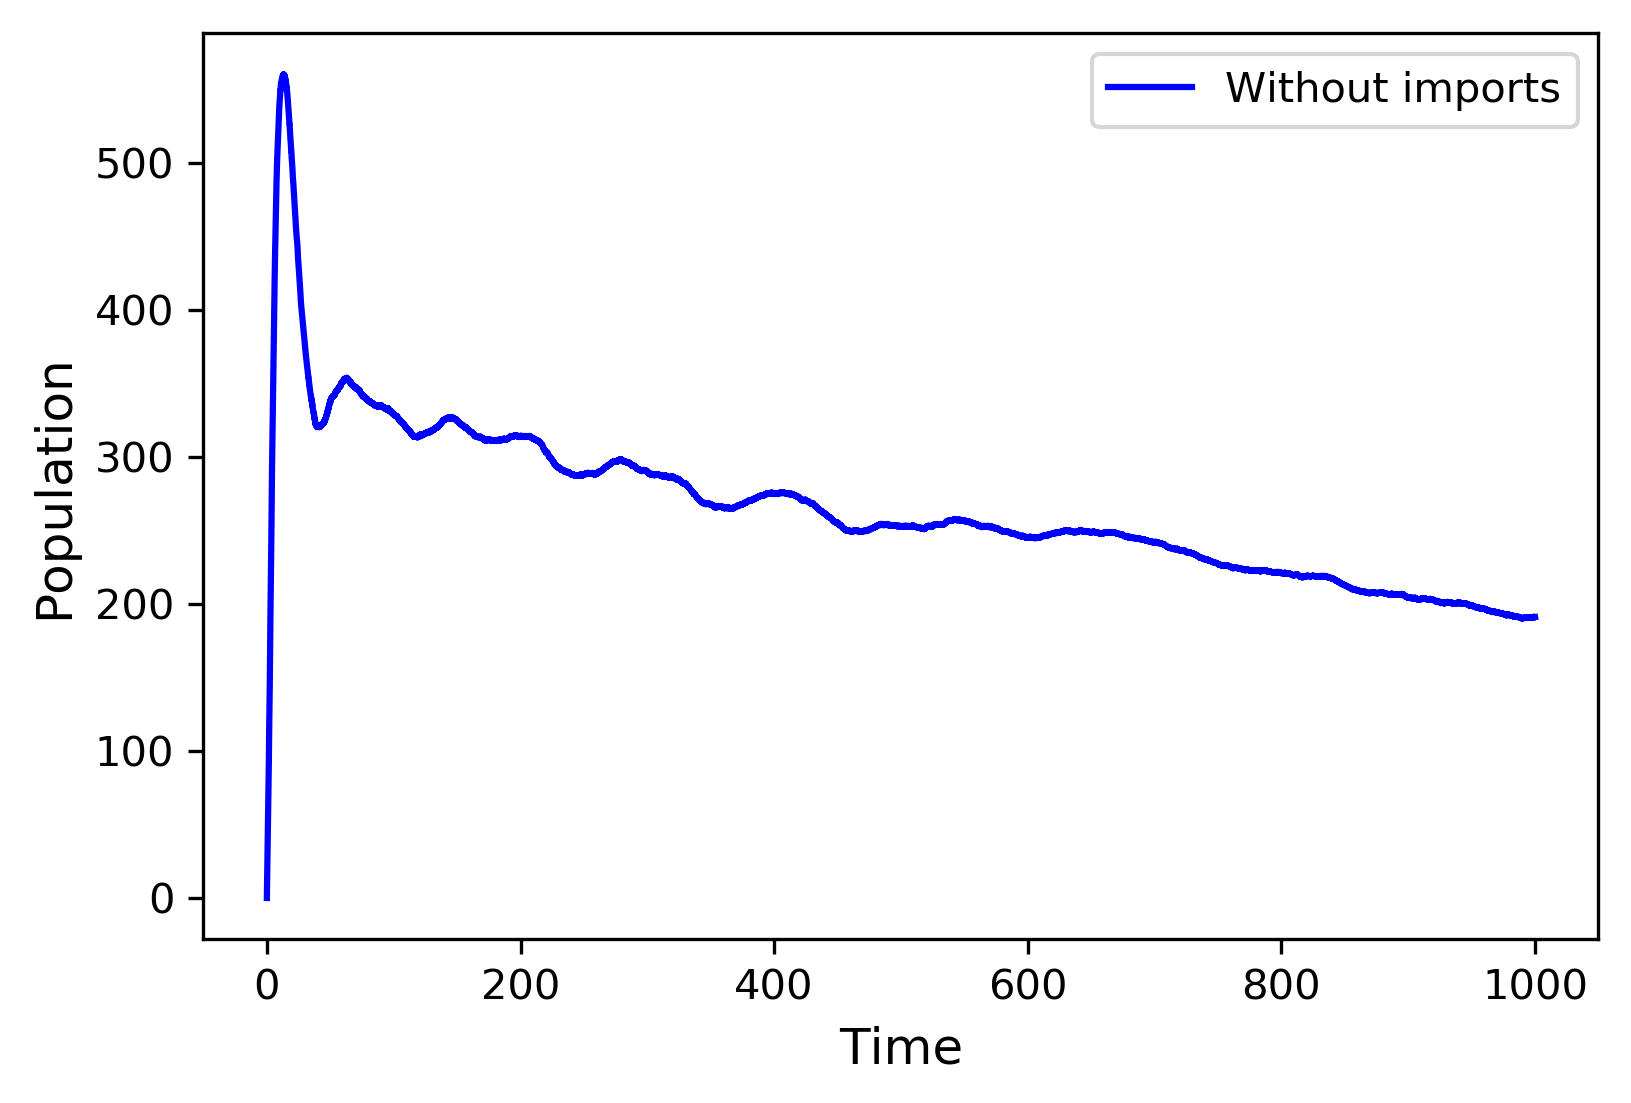

In [113]:
# imports and extinction over 100 runs

def variability2(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X, Y, Z
    For constant population, if pop not constant uncomment the N_list lines
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    X2_list = []
    Y2_list = []
    Z2_list = []
    N2_list = []
    time_list = []
    length_list = []
    
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)
        outcome2 = sir_event_demo_imports(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        X2_list.append(outcome2[0])
        Y2_list.append(outcome2[1])
        Z2_list.append(outcome2[2])
        N2_list.append(outcome2[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    outcomes = [X_list, Y_list, Z_list]  
    outcomes2 = [X2_list, Y2_list, Z2_list] 
    names = ["Susceptibles.png", "Infecteds.png", "Recovereds.png"]

    # get shortest length
    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)

    # plot for every class
    for k in range(len(outcomes)):

        # save mean, max and min per timestep
        mean_list = []
        mean2_list = []
        for i in range(minimum_length):
            timestep = []
            timestep2 = []
            for j in range(runs):
                timestep.append(outcomes[k][j][i])
                timestep2.append(outcomes2[k][j][i])
            mean_list.append(np.mean(timestep))
            mean2_list.append(np.mean(timestep2))

        # plot mean, max and min
        mean_line = plt.plot(time_list[index_t], mean_list, 'b', label="Without imports")
        #mean2_line = plt.plot(time_list[index_t], mean2_list, 'r', label="With imports")


        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Population", fontsize=12)
        #plt.ylim(0, 200)
        plt.legend()
        plt.show()
        
        

    # blue = mpatches.Patch(color="b", label="Mean")
    # red = mpatches.Patch(color="r", label="Max")
    # green = mpatches.Patch(color="g", label="Min")
    # plt.legend(handles=[blue, red, green])

    
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 1000
t_det = np.linspace(0,t,1000)
beta = 1
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001


#Generate solutions
variability2(100, y0, t, beta, gamma)

## Increased transients and stochastic resonance

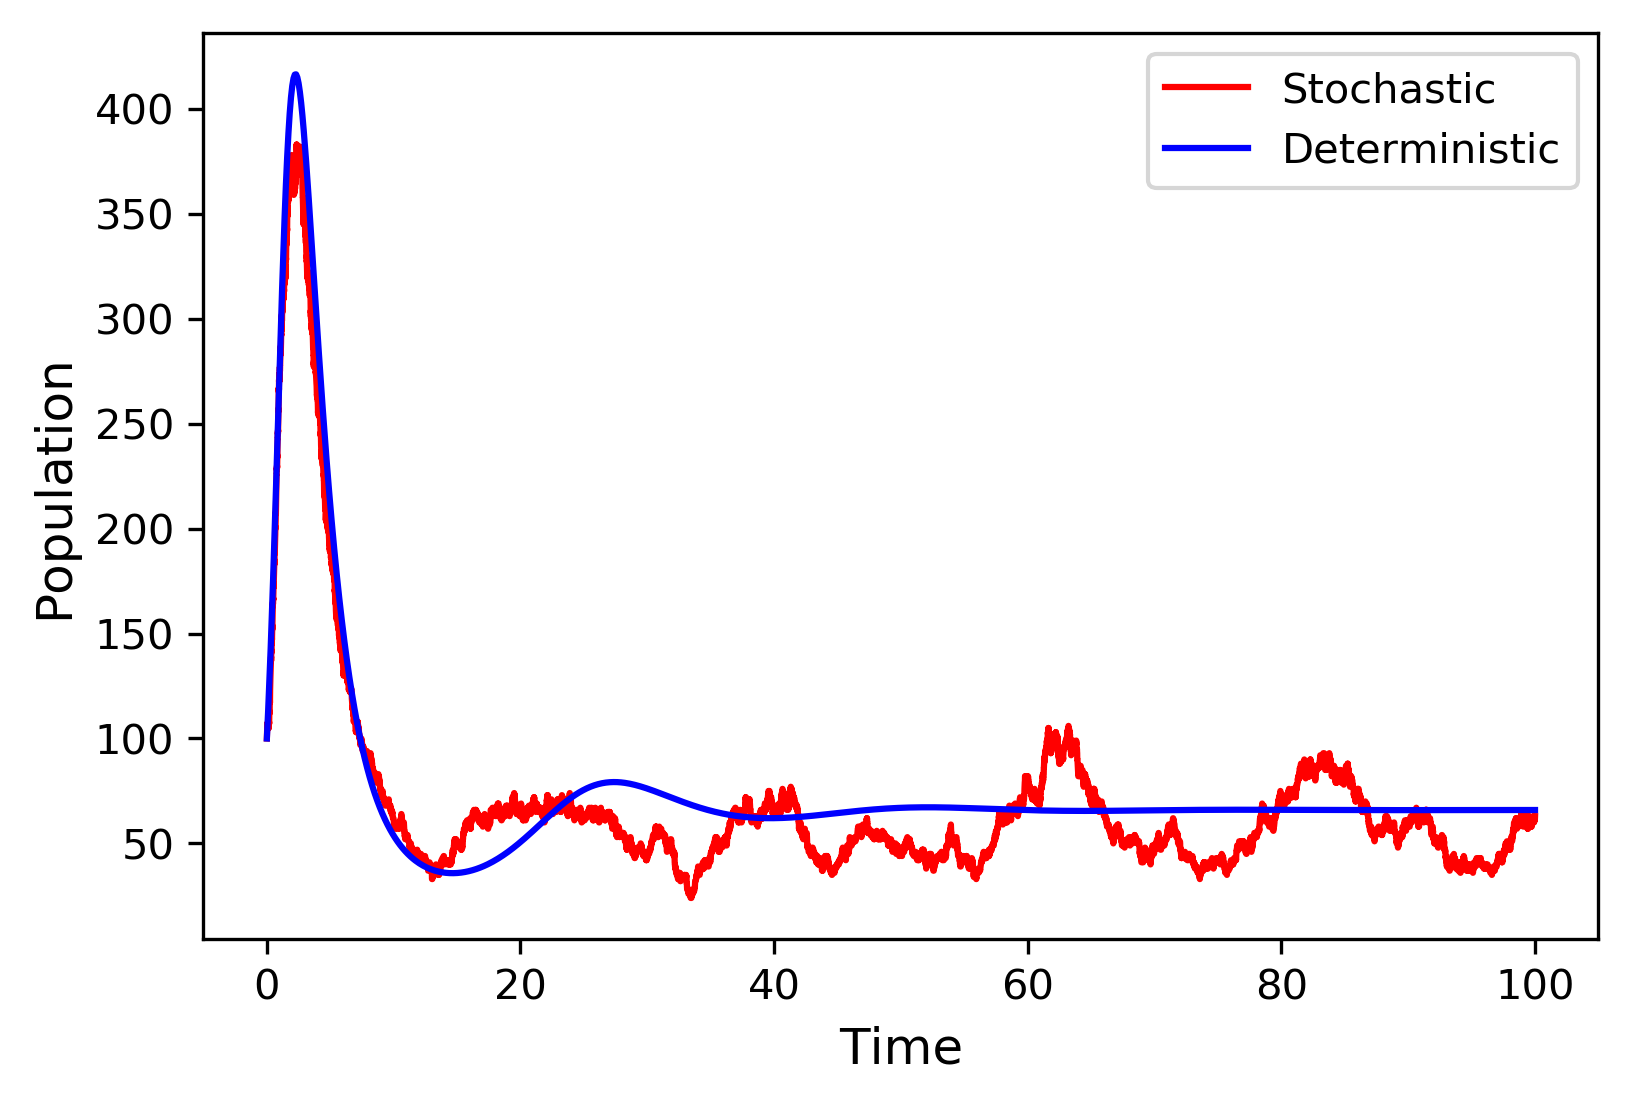

In [128]:
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 100
t_det = np.linspace(0,t,1000)
beta = 2
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
X, Y, Z, N, time_list = sir_event_demo(y0, t, beta, gamma)
ret = odeint(diff, y_det0, t_det, args=(beta, gamma))

plt.plot(time_list, Y, 'r', label="Stochastic")
plt.plot(t_det, ret[:,1]*N0, 'b', label="Deterministic")
#plt.plot(time_list, Z, 'g', label="Recovered")
#plt.plot(time_list, N, 'y', label="Population")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.show()



## Extinctions

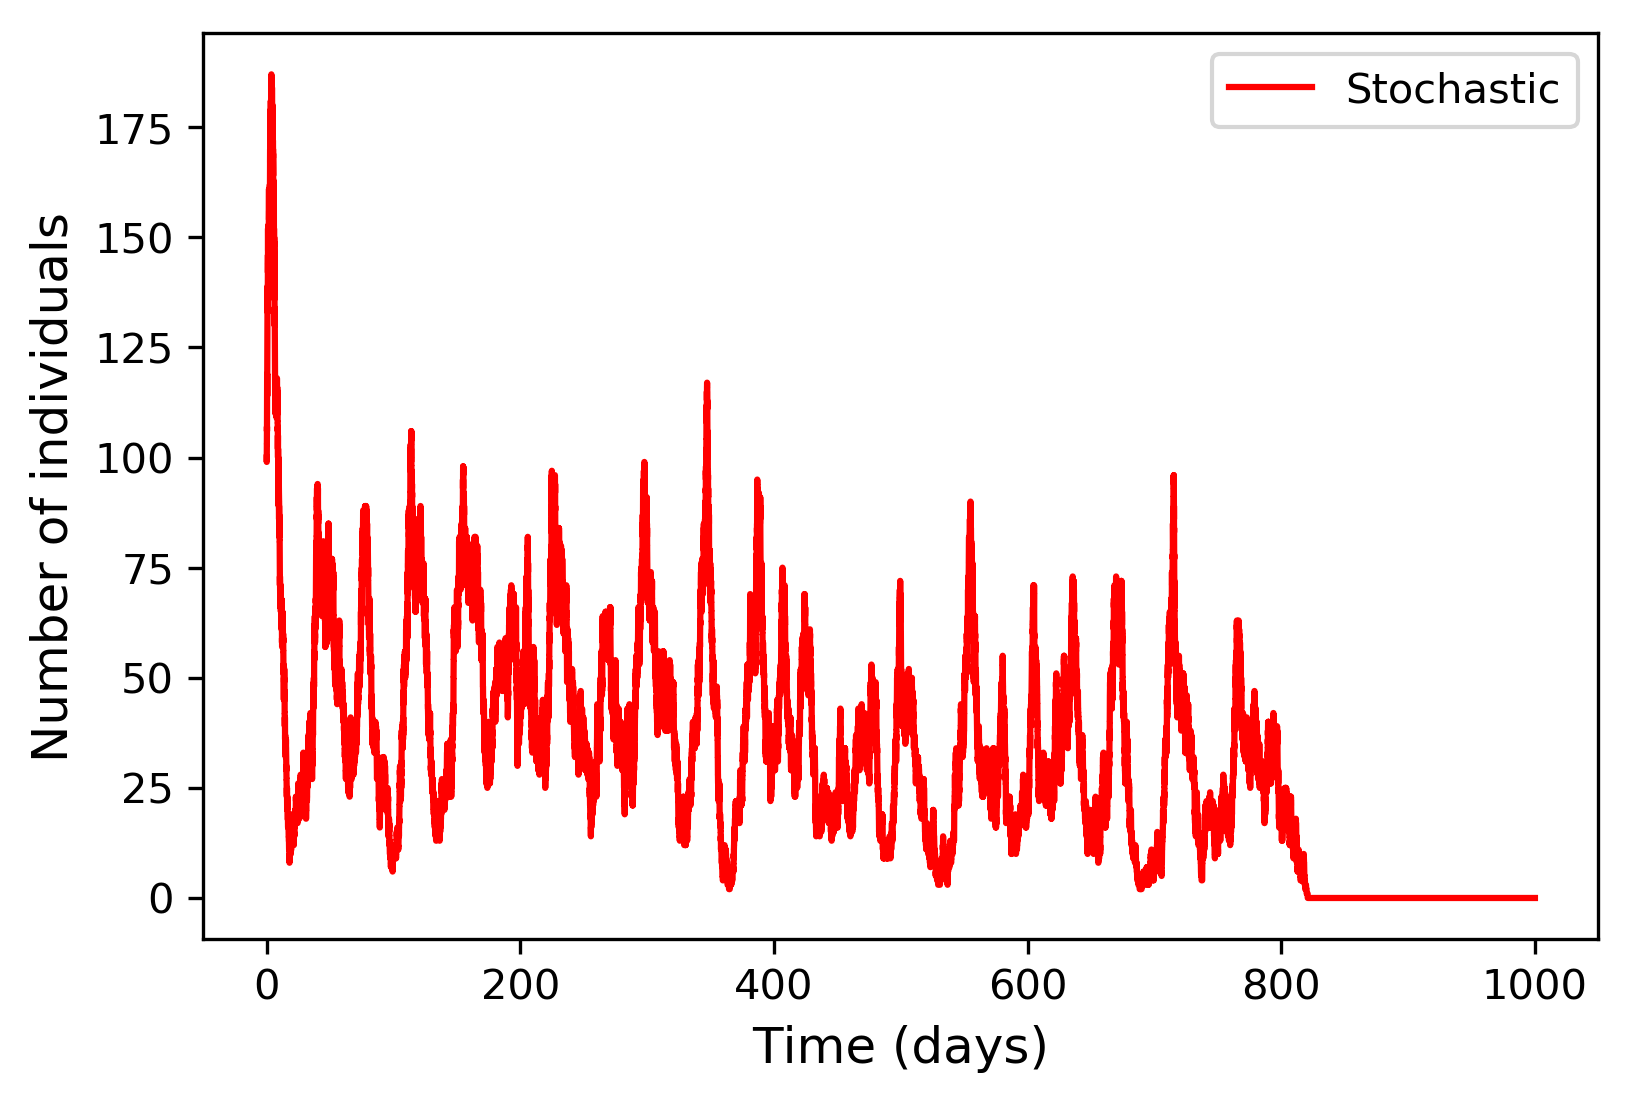

In [130]:
# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 1000
t_det = np.linspace(0,t,1000)
beta = 1
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
X, Y, Z, N, time_list = sir_event_demo(y0, t, beta, gamma)

plt.plot(time_list, Y, 'r', label="Stochastic")
#plt.plot(time_list, Z, 'g', label="Recovered")
#plt.plot(time_list, N, 'y', label="Population")
plt.xlabel("Time (days)", fontsize=12)
plt.ylabel("Number of individuals", fontsize=12)
plt.legend()
plt.show()


## Import

(59779, 19748, 42722, 13489, 4238, 41600, 101, 27116)


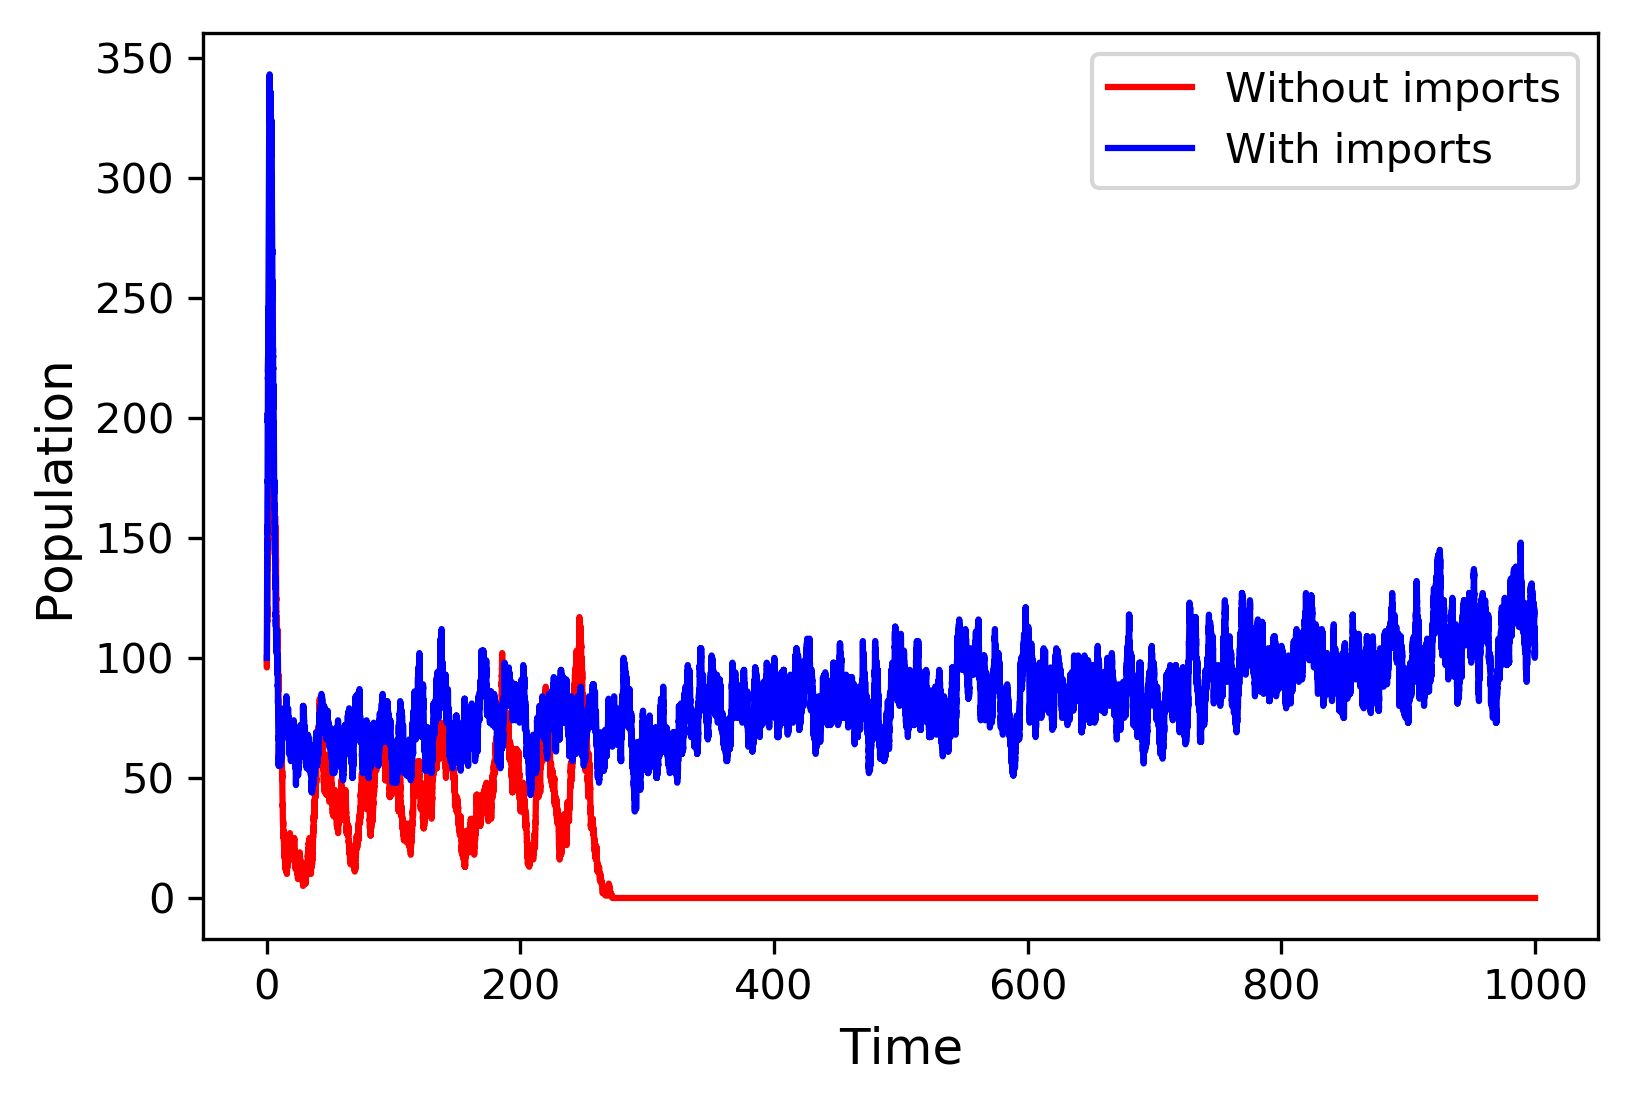

In [87]:
#import vs no imports
#Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 1000
beta = 1
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.1
epsilon = 0.1

#Generate solutions
X, Y, Z, N, time_list = sir_event_demo(y0, t, beta, gamma)
XI, YI, ZI, NI, time_listI = sir_event_demo_imports(y0, t, beta, gamma)

plt.plot(time_list, Y, 'r', label="Without imports")
plt.plot(time_listI, YI, 'b', label="With imports")
#plt.plot(time_list, Z, 'g', label="Recovered")
#plt.plot(time_list, N, 'y', label="Population")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.show()

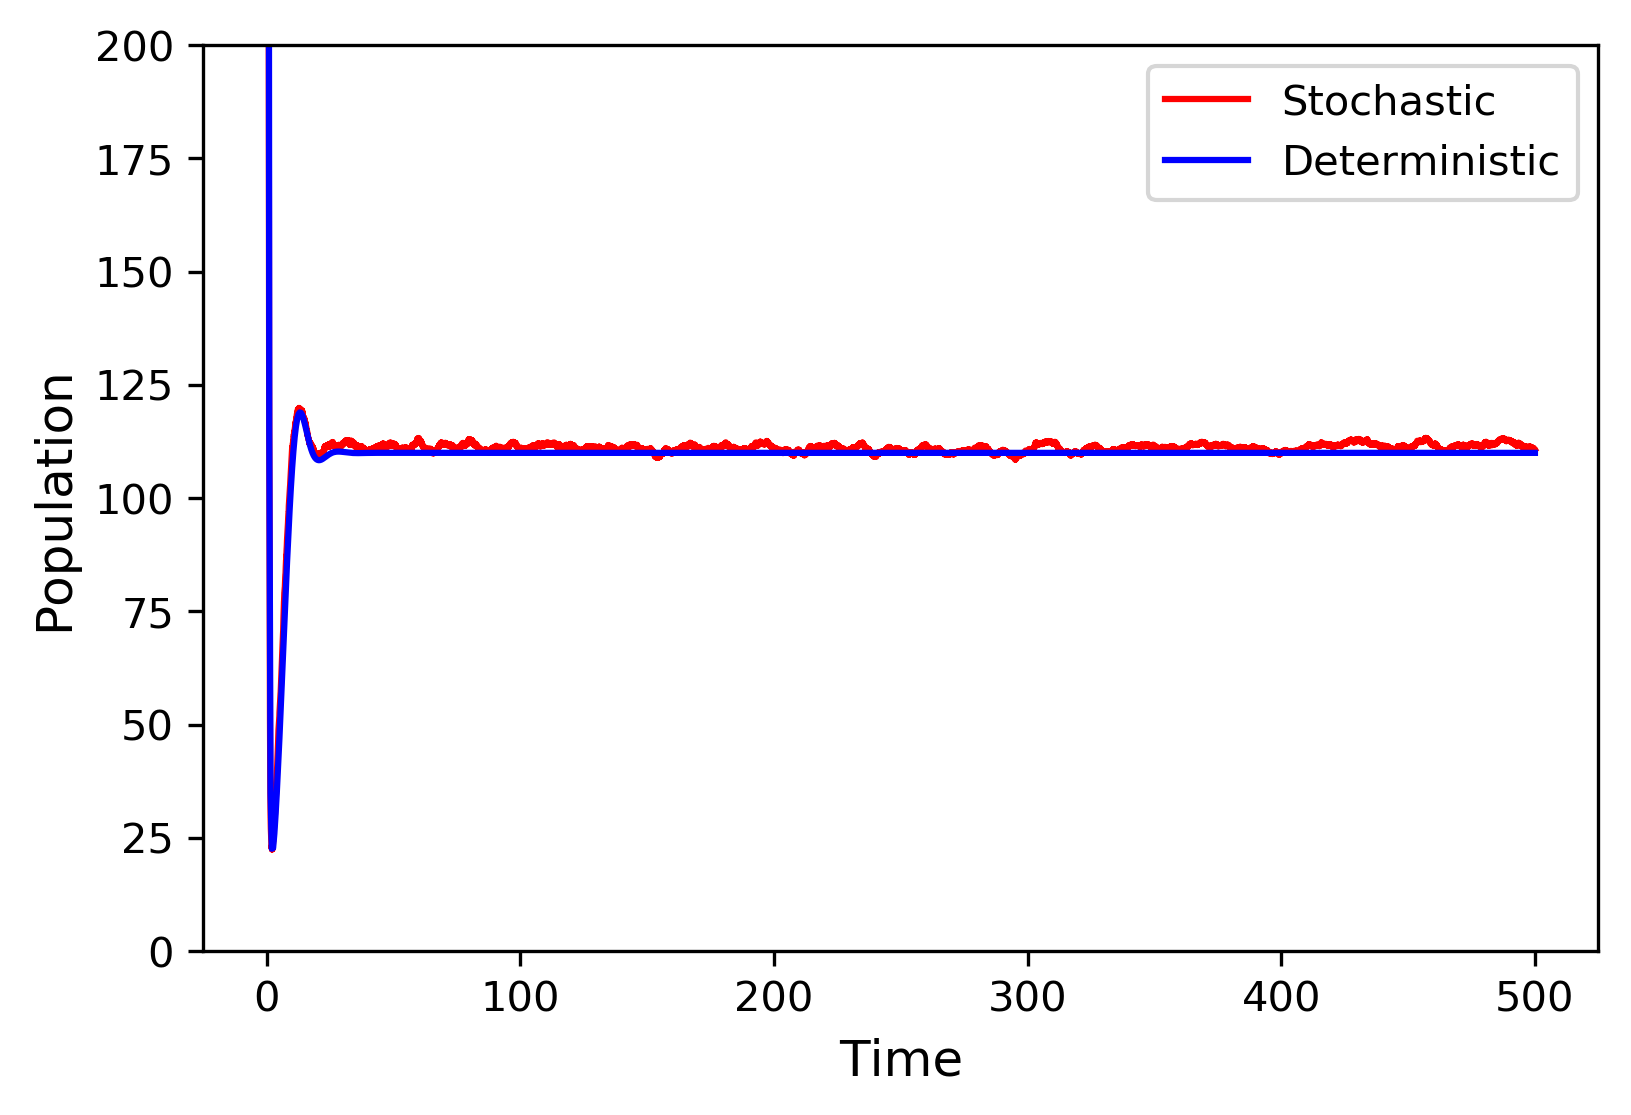

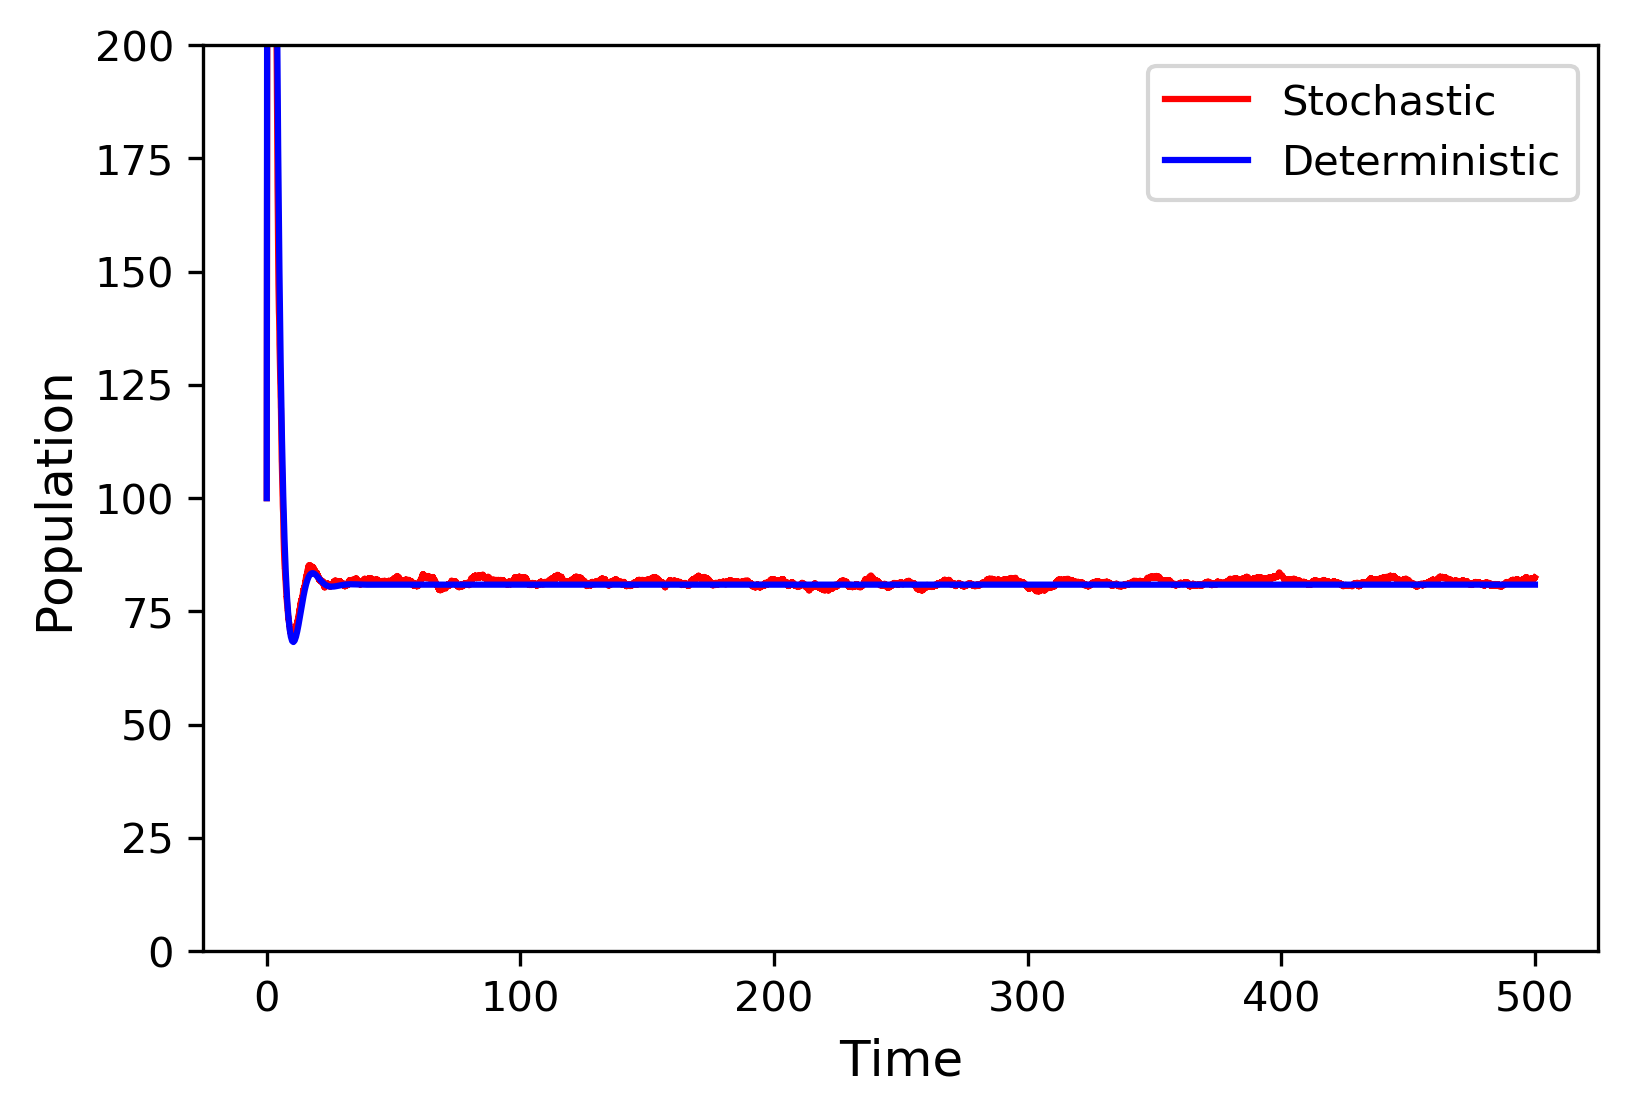

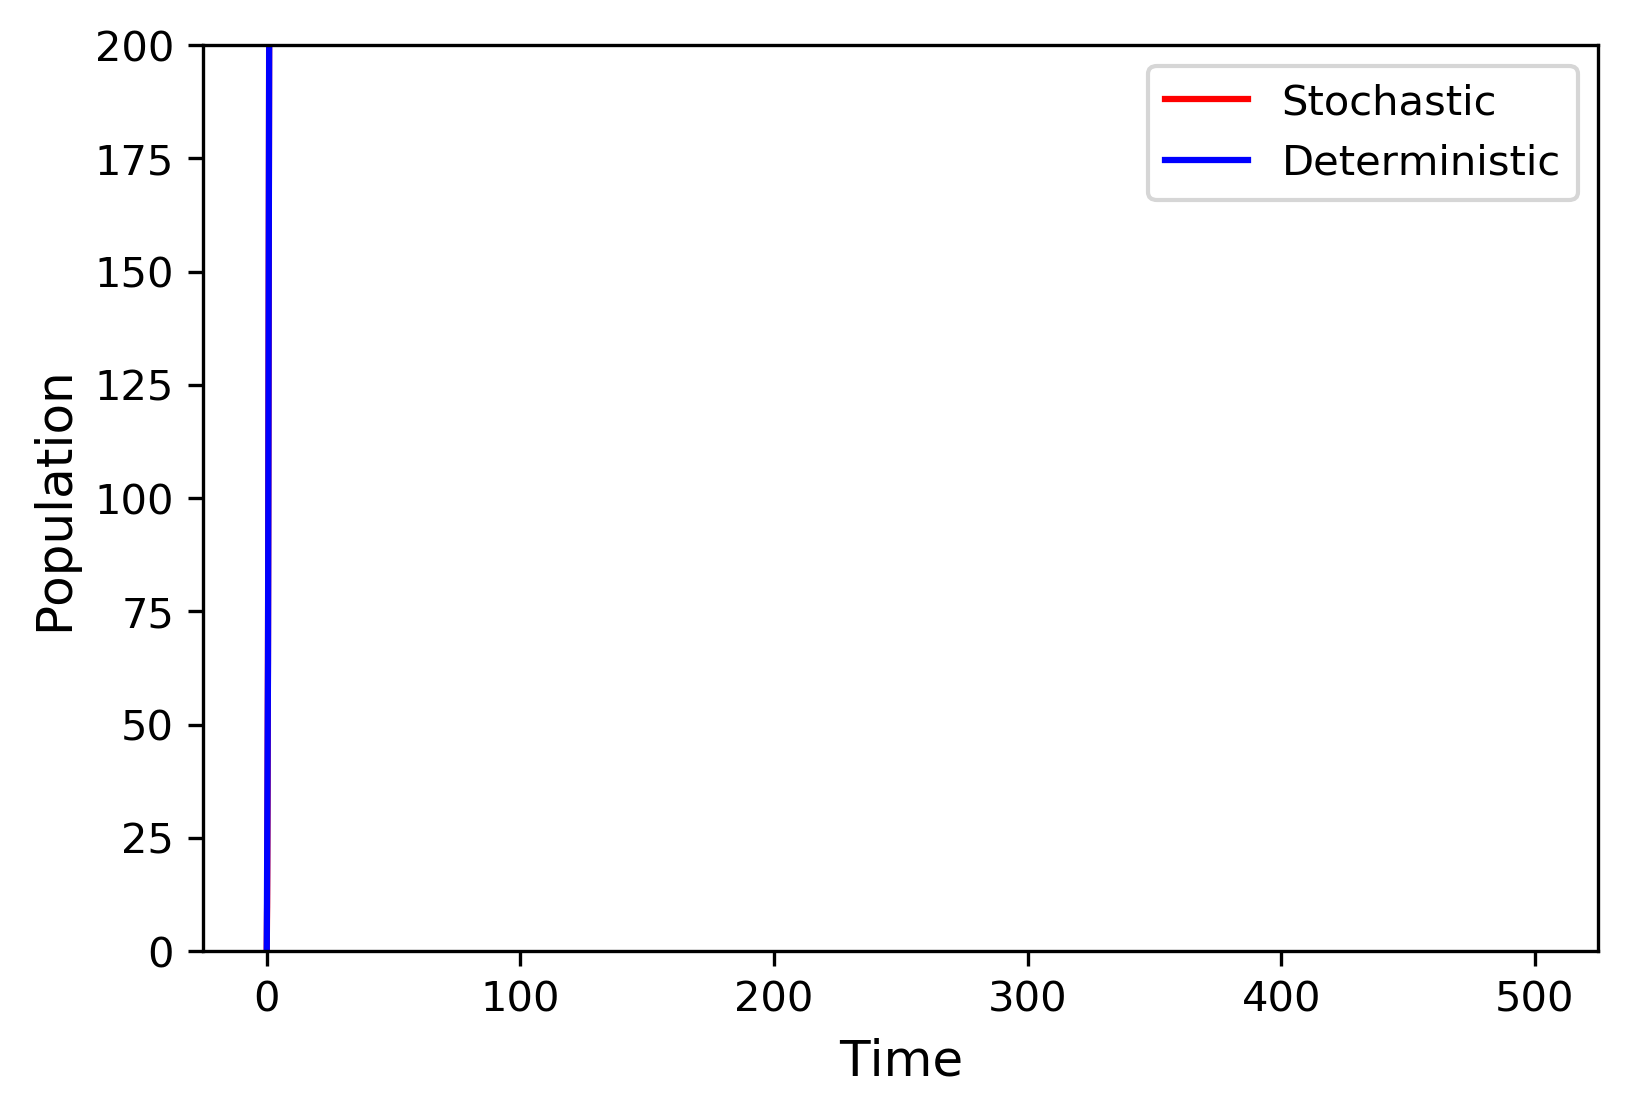

-409
87


In [89]:
#Average of 100 runs of stochastic X and Y vs deterministic X and Y

def variability2(runs, initial_values, t, beta, gamma):
    """
    Plots the mean, max, and min value over runs number of runs of X, Y, Z
    For constant population, if pop not constant uncomment the N_list lines
    """

    # make a list with runs list of X, Y, Z and N
    X_list = []
    Y_list = []
    Z_list = []
    N_list = []
    time_list = []
    length_list = []
    for i in range(runs):
        outcome = sir_event_demo(initial_values, t, beta, gamma)

        X_list.append(outcome[0])
        Y_list.append(outcome[1])
        Z_list.append(outcome[2])
        N_list.append(outcome[3])
        time_list.append(outcome[4])
        length_list.append(len(outcome[0]))

    outcomes = [X_list, Y_list, Z_list]
    names = ["Susceptibles.png", "Infecteds.png", "Recovereds.png"]

    # get shortest length
    minimum_length = min(length_list)
    index_t = length_list.index(minimum_length)

    # plot for every class
    for k in range(len(outcomes)):

        # save mean, max and min per timestep
        mean_list = []
        max_list = []
        min_list = []
        for i in range(minimum_length):
            timestep = []
            for j in range(runs):
                timestep.append(outcomes[k][j][i])
            mean_list.append(np.mean(timestep))
            max_list.append(max(timestep))
            min_list.append(min(timestep))

        # plot mean, max and min
        mean_line = plt.plot(time_list[index_t], mean_list, 'r', label="Stochastic")
        #max_line = plt.plot(time_list[index_t], max_list, 'r', label="Max")
        #min_line = plt.plot(time_list[index_t], min_list, 'g', label="Min")
        det_line = plt.plot(t_det, ret[:,k]*N0, 'b', label="Deterministic")

        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Population", fontsize=12)
        plt.ylim(0, 200)
        plt.legend()
        plt.show()

    # blue = mpatches.Patch(color="b", label="Mean")
    # red = mpatches.Patch(color="r", label="Max")
    # green = mpatches.Patch(color="g", label="Min")
    # plt.legend(handles=[blue, red, green])

covariance_number = 87
covariance_value = - 409
# Deterministic model
def diff(y, t, beta, gamma):
    S, I, R, N = y
    dSdt = mu * N -beta * S * I / N - mu * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dNdt = dSdt + dIdt + dRdt
    return [dSdt, dIdt, dRdt, dNdt]


# Parameters
N0 = 1000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0
y_det0 = [X0/N0,Y0/N0,Z0,N0/N0]

t = 500
t_det = np.linspace(0,t,1000)
beta = 5
gamma = 1 / 2
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

#Generate solutions
ret = odeint(diff, y_det0, t_det, args=(beta, gamma))
variability2(500, y0, t, beta, gamma)

In [ ]:
# Covariance and phase plot

#Parameters
N0 = 10000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = X0, Y0, Z0, N0

t = 150
# beta = 1 / 3
# gamma = 0.01
beta = 1/2
gamma = 1 / 6
mu = 5e-2
# rho = 0.3
delta = 0.01
epsilon = 0.001

# Generate solution
X, Y, Z, N, time_list = sir_event_demo(y0, t, beta, gamma)
# print(time_list)

plt.plot(X, Y, 'r', label="Stochastic")

t = np.linspace(0, 150, 1000)

ret = odeint(diff, y0, t, args=(beta, gamma))
X, Y, Z, N = ret.T
plt.plot(X, Y, 'b', label="Deterministic")


# # NEGATIVE COVARIANCE EXPERIMENT
# def negative_covariance(X, Y):
#     two_d = np.vstack((np.asarray(X), np.asarray(Y)))
#     print(np.cov(two_d))

# negative_covariance(X, Y)

# PHASEPLOT INCREASED TRANSIENTS
plt.plot(X, Y)

plt.xlabel("Number of susceptible individuals", fontsize=12)
plt.ylabel("Number of infected individuals", fontsize=12)
plt.ticklabel_format(style='sci', scilimits=(0,0))
plt.legend()
plt.savefig("phaseplot_transients.png", dpi=300)
plt.show()



#  # plot S(t), I(t) and R(t)
# plt.plot(time_list, X, 'b', label="Susceptible")
# plt.plot(time_list, Y, 'r', label="Infected")
# # plt.plot(time_list, Z, 'g', label="Recovered")
# # plt.plot(time_list, N, 'y', label="Population")
# plt.xlabel("Time", fontsize=12)
# plt.ylabel("Population", fontsize=12)
# plt.grid(True, axis='x')
# plt.legend()
#
# plt.savefig("negative_covariance.png", dpi=300)
# plt.show()

## Meta-population 

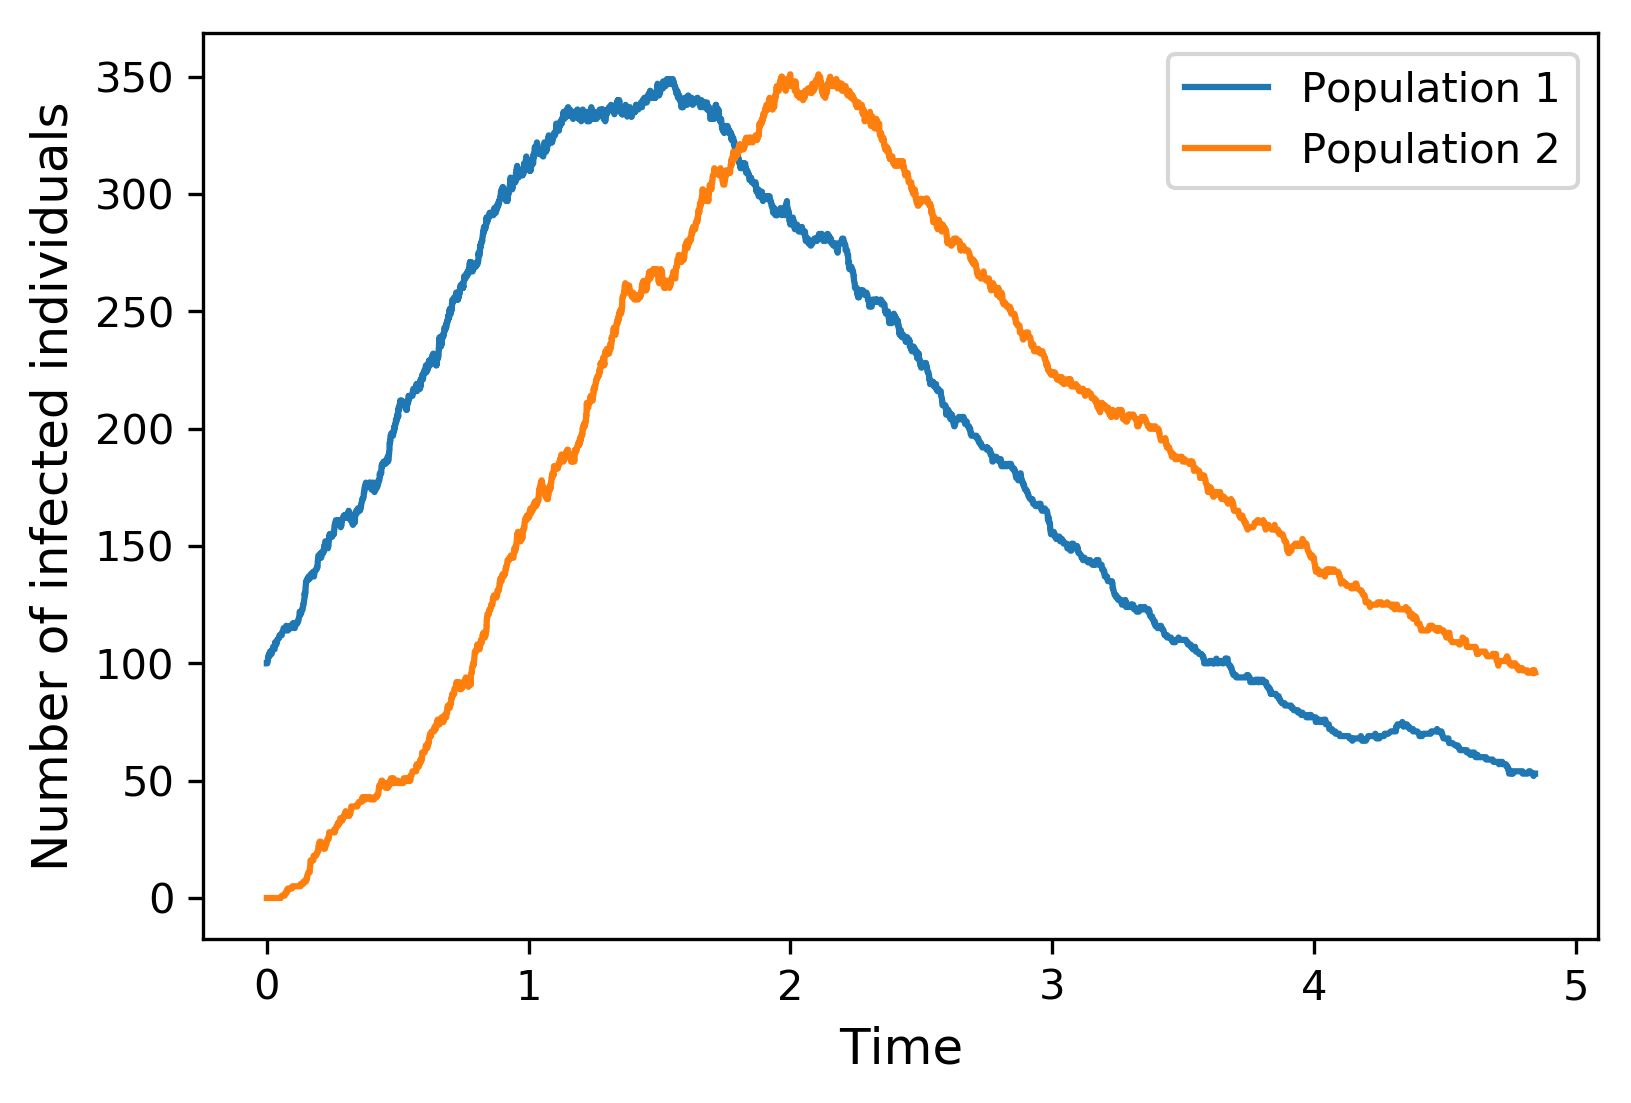

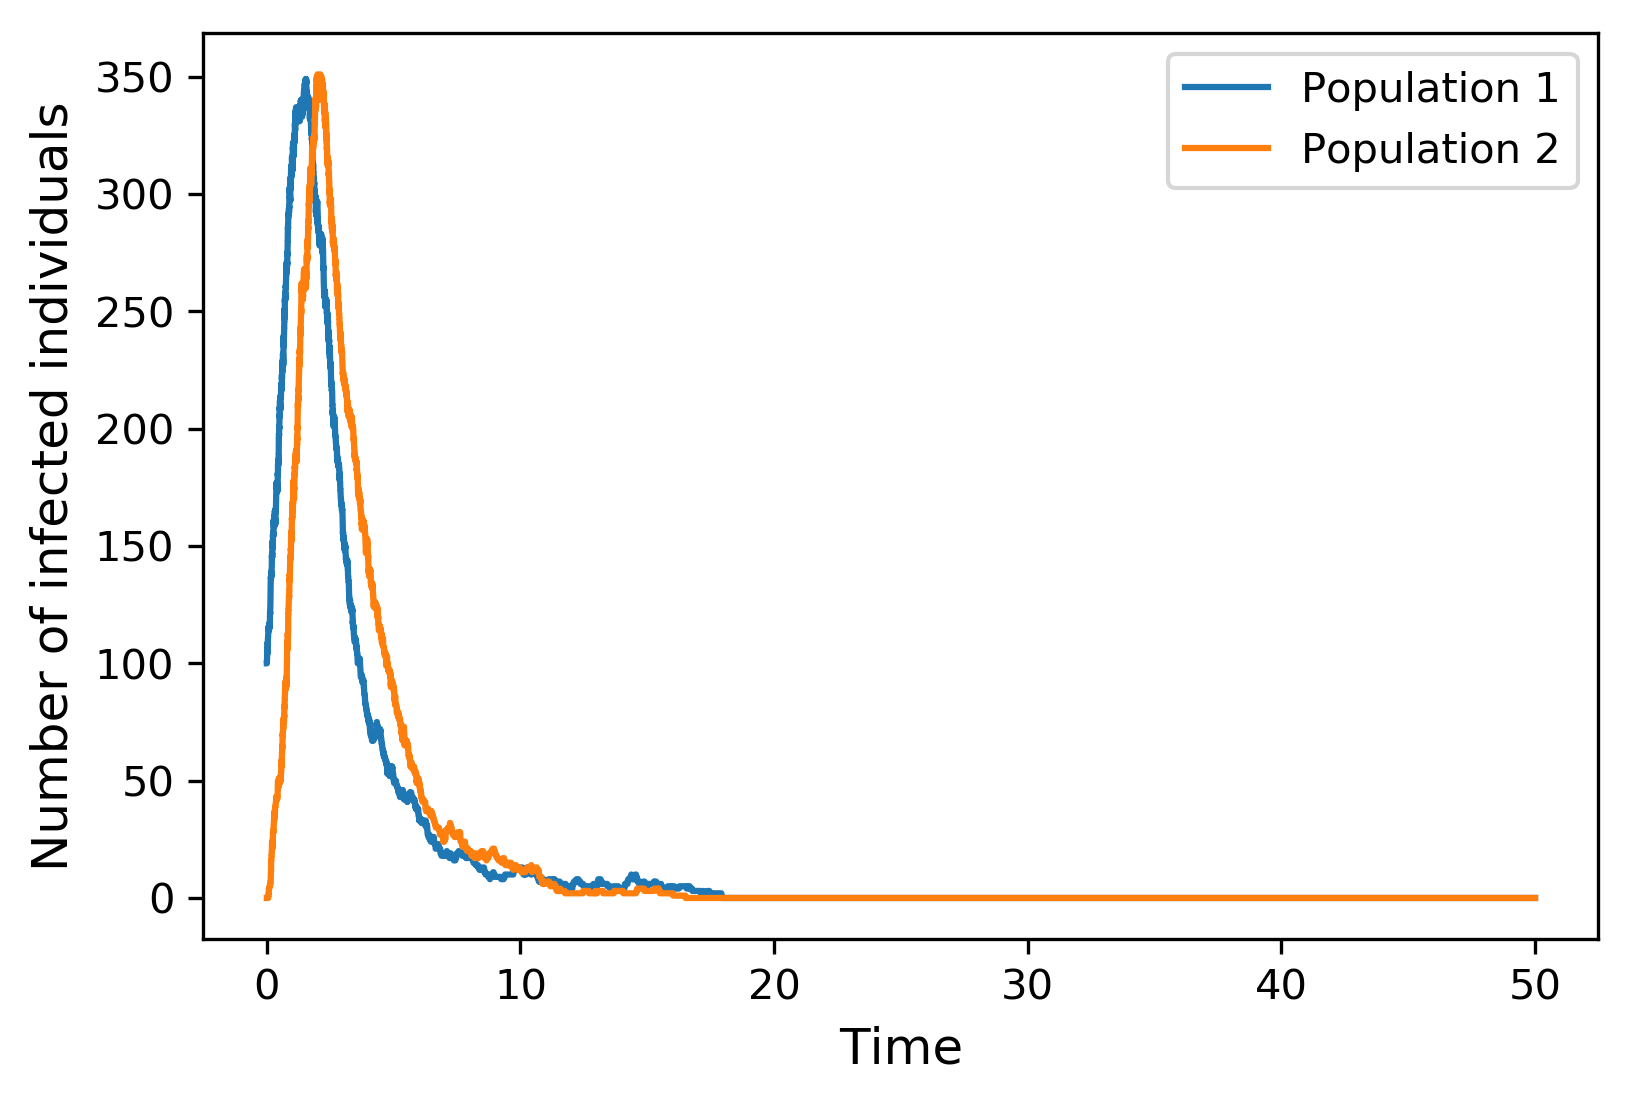

In [119]:
#Meta-population method

def metapop(pop_y, t):

    time = 0
    time_list = [0]
    while time < t:

        rates = []
        i = 0
        for pop in pop_y:
            X = pop.get("X")[-1]
            Y = pop.get("Y")[-1]
            Z = pop.get("Z")[-1]
            N = pop.get("N")[-1]

            # calculate labda
            sum = 0
            for j in range(len(pop_y)):
                sum += rho[i][j] * pop_y[j].get("Y")[-1] / N
            labda = beta * sum

            rate_list = [mu * N, labda * X , gamma * Y, mu * X, mu * Y, mu * Z]
            for rate in rate_list:
                rates.append(rate)

            i += 1

        dt = []
        for i in range(len(rates)):
            u = np.random.uniform(0, 1)
            if rates[i] < 0.0001:
                dt.append(100000)
            else:
                dt.append(-np.log(u) / rates[i])

        next_event = dt.index(min(dt))
        pop_event = next_event // len(rate_list)

        i = 0
        for pop in pop_y:

            # get X, Y, Z, N
            X = pop.get("X")[-1]
            Y = pop.get("Y")[-1]
            Z = pop.get("Z")[-1]
            N = pop.get("N")[-1]

            # the population in which the event happens
            if i == pop_event:
                next_event = next_event % len(rate_list)

                if next_event == 0:
                    X = X + 1
                    N = N + 1

                elif next_event == 1:
                    X = X - 1
                    Y = Y + 1

                elif next_event == 2:
                    Y = Y - 1
                    Z = Z + 1

                elif next_event == 3:
                    X = X - 1
                    N = N -1

                elif next_event == 4:
                    Y = Y - 1
                    N = N - 1

                else:
                    Z = Z - 1
                    N = N - 1

            pop.get("X").append(X)
            pop.get("Y").append(Y)
            pop.get("Z").append(Z)
            pop.get("N").append(N)

            i += 1

        time += min(dt)
        time_list.append(time)

    return pop_y, time_list


# EXPERIMENT 1
N = 1000
Y = 100
Z = 0
X = N - Y - Z

t = 50
beta = 3
gamma = 1
mu = 0.05
rho = [[1, 0.1], [0.1, 1]]

pop_1 = {"X" : [X], "Y" : [Y], "Z" : [Z], "N" : [N]}
pop_2 = {"X" : [N], "Y" : [0], "Z" : [Z], "N" : [N]}

pop_y = [pop_1, pop_2]

pop_dict_list, time_list = metapop(pop_y, t)

zoom = int(len(time_list) / 3)
for i in range(len(pop_dict_list)):
    plt.plot(time_list[:zoom], pop_dict_list[i].get("Y")[:zoom], label="Population " + str(i + 1))

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of infected individuals", fontsize=12)
plt.savefig("metapop_exp1_zoom.png", dpi=300)
plt.show()

for i in range(len(pop_dict_list)):
    plt.plot(time_list, pop_dict_list[i].get("Y"), label="Population " + str(i + 1))

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of infected individuals", fontsize=12)
plt.savefig("metapop_exp1_no_zoom.png", dpi=300)
plt.show()



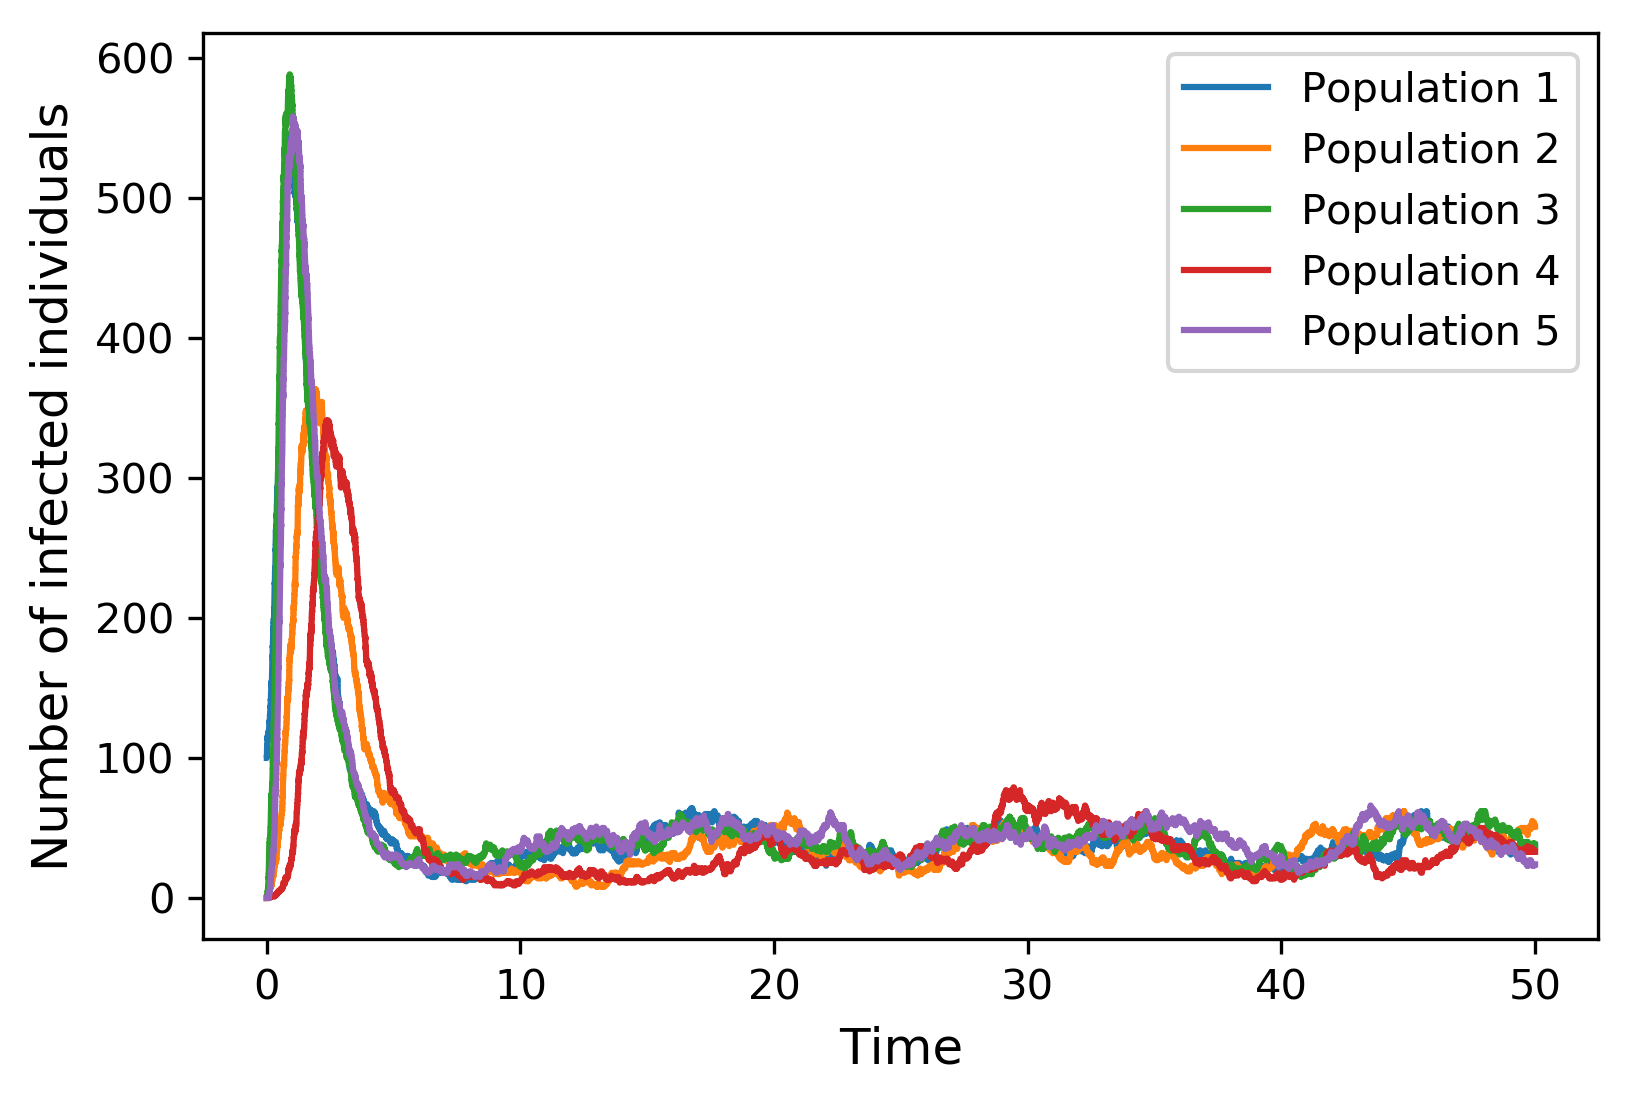

In [120]:

# EXPERIMENT 2
N = 1000
Y = 100
Z = 0
X = N - Y - Z

t = 50
beta = 3
gamma = 1
mu = 0.05
rho = [[1, 0.1, 0.9, 0, 0], [0.1, 1, 0, 0.1, 0], [0.9, 0, 1, 0, 0.9], [0, 0.1, 0, 1, 0], [0, 0, 0.9, 0, 1]]

pop_1 = {"X" : [X], "Y" : [Y], "Z" : [Z], "N" : [N], "beta" : 3, "gamma" : 1, "mu" : 0.05}
pop_2 = {"X" : [N], "Y" : [0], "Z" : [Z], "N" : [N], "beta" : 3, "gamma" : 1, "mu" : 0.05}
pop_3 = {"X" : [N], "Y" : [0], "Z" : [Z], "N" : [N], "beta" : 3, "gamma" : 1, "mu" : 0.05}
pop_4 = {"X" : [N], "Y" : [0], "Z" : [Z], "N" : [N], "beta" : 3, "gamma" : 1, "mu" : 0.05}
pop_5 = {"X" : [N], "Y" : [0], "Z" : [Z], "N" : [N], "beta" : 3, "gamma" : 1, "mu" : 0.05}

pop_y = [pop_1, pop_2, pop_3, pop_4, pop_5]

pop_dict_list, time_list = metapop(pop_y, t)

for i in range(len(pop_dict_list)):
    plt.plot(time_list, pop_dict_list[i].get("Y"), label="Population " + str(i + 1))

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of infected individuals", fontsize=12)
plt.savefig("metapop_t_50_2.png", dpi=300)
plt.show()

## Lattice-based model

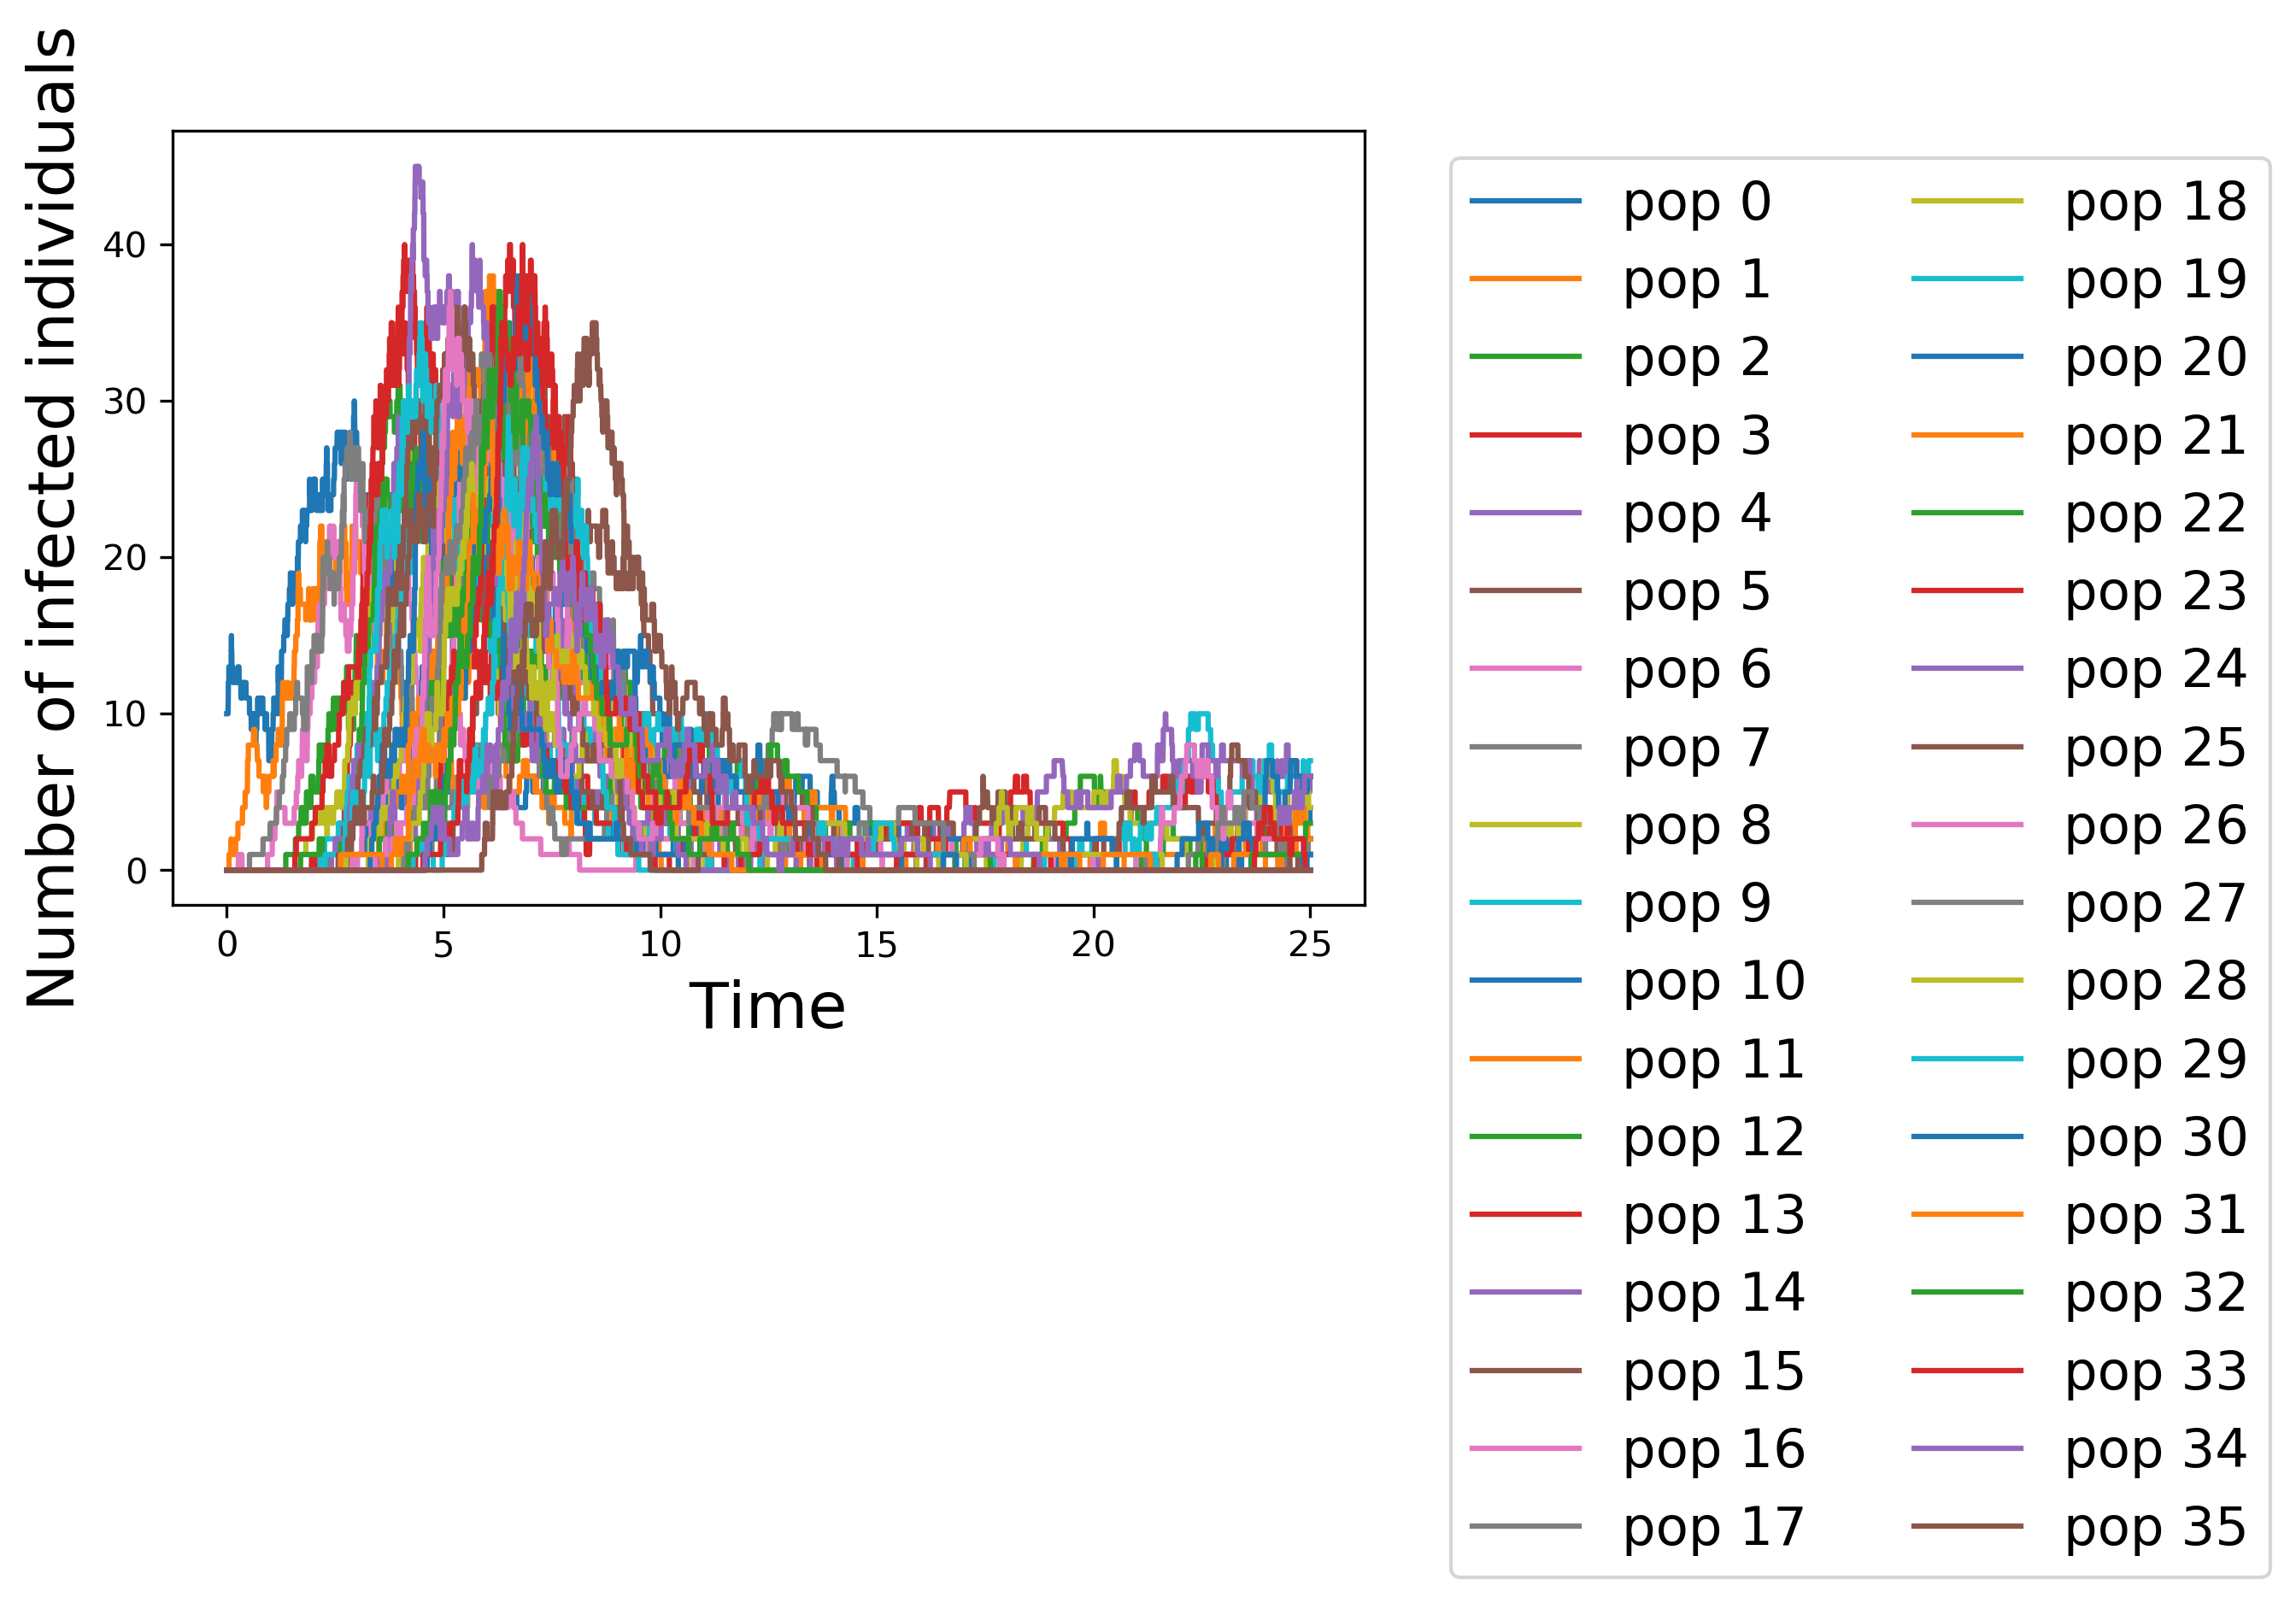

0


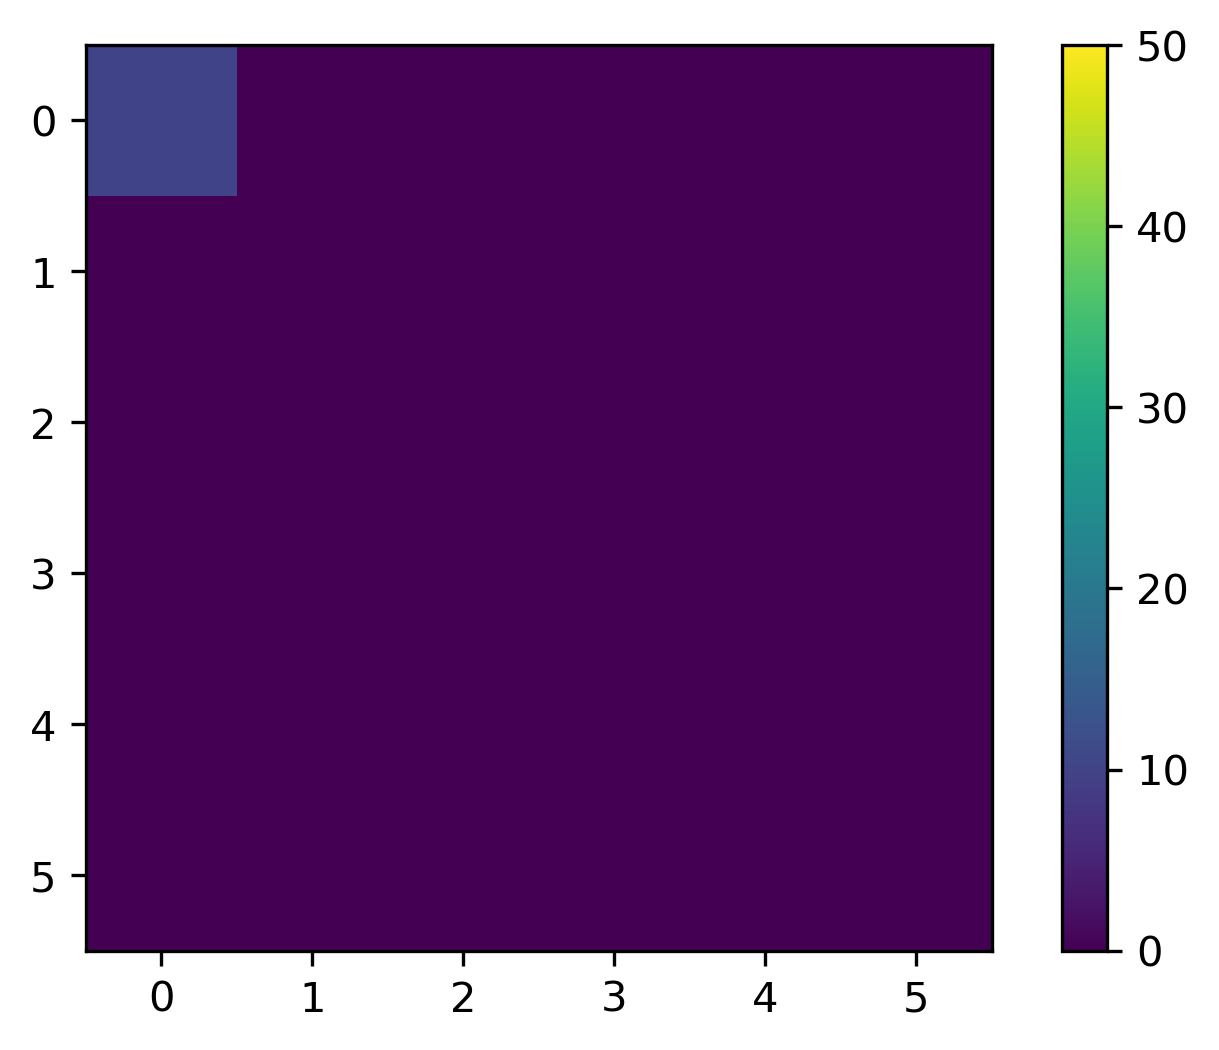

1750


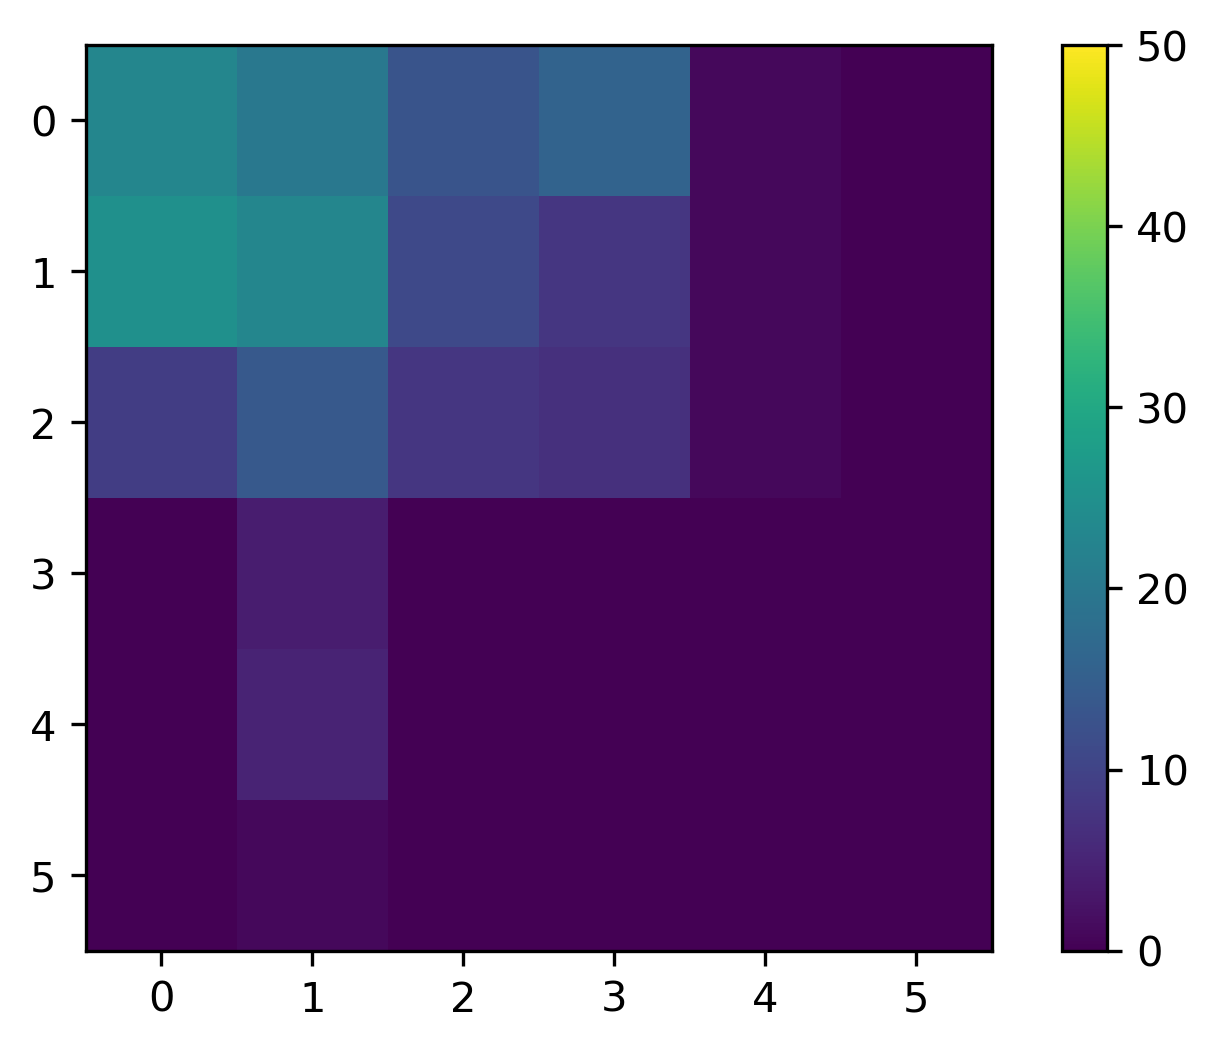

3500


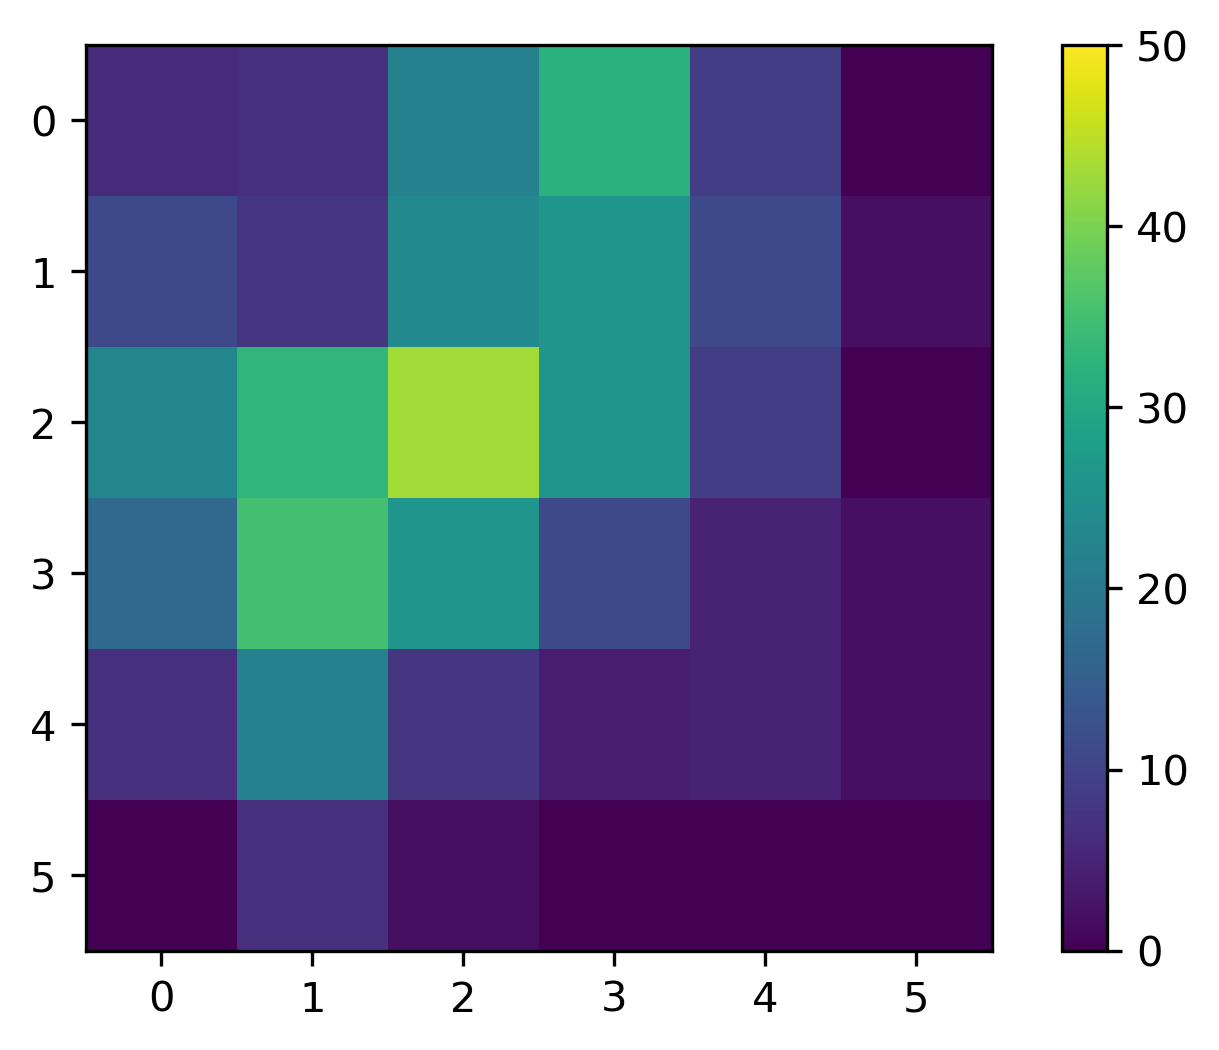

5250


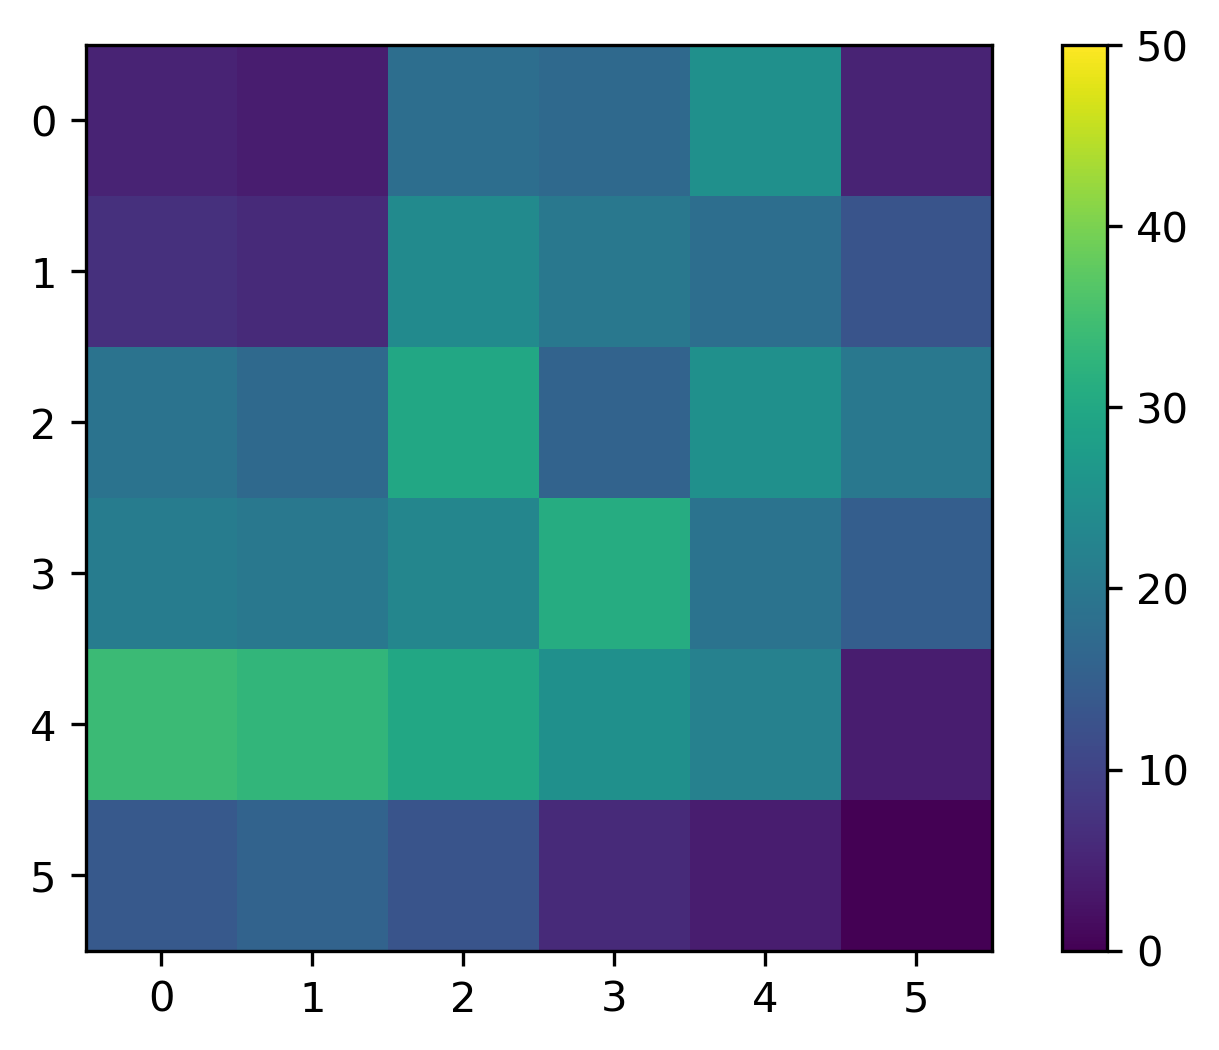

7000


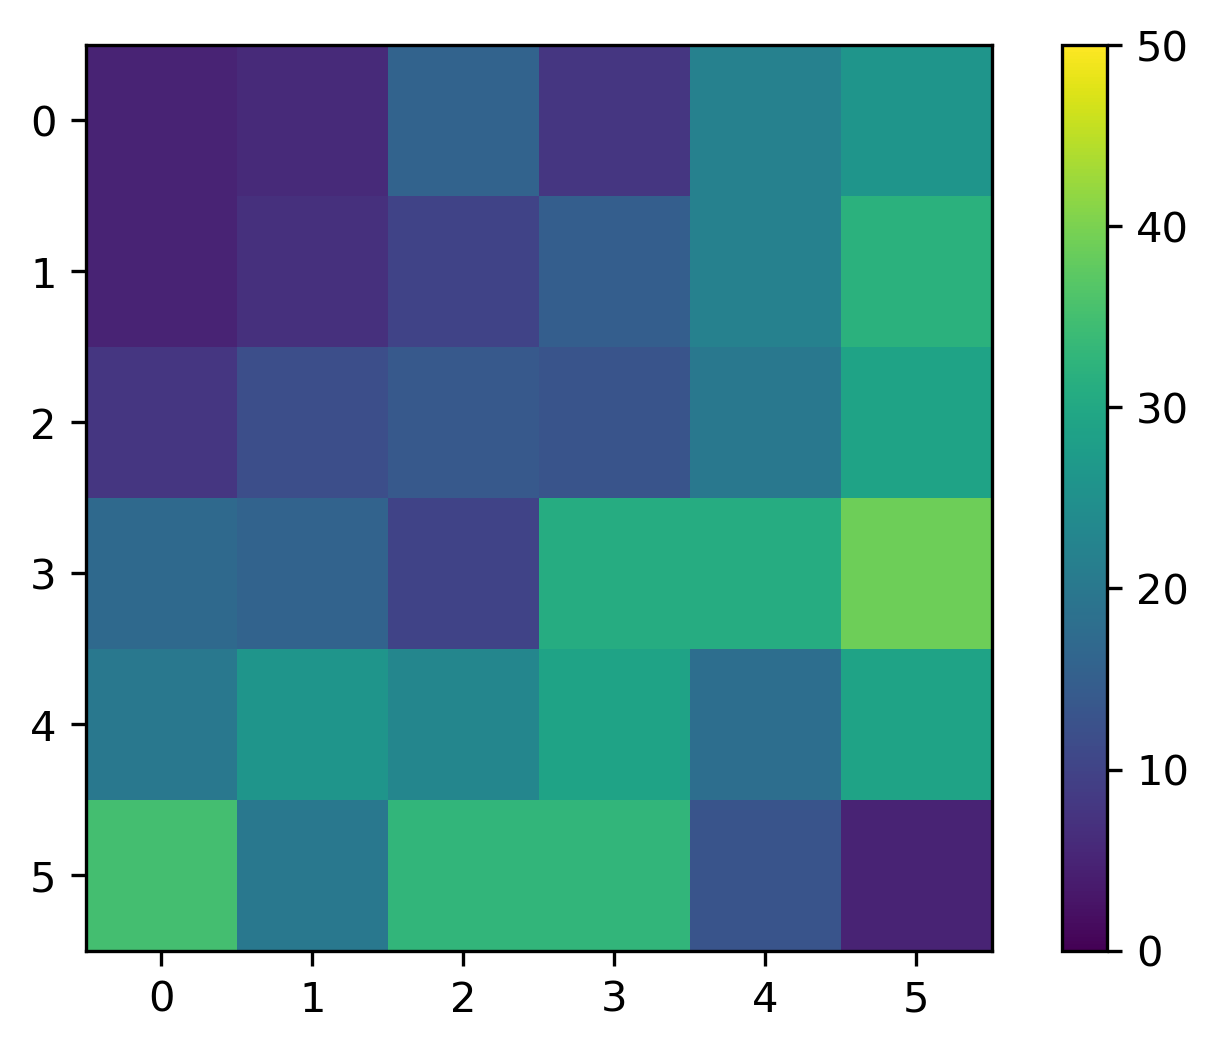

8750


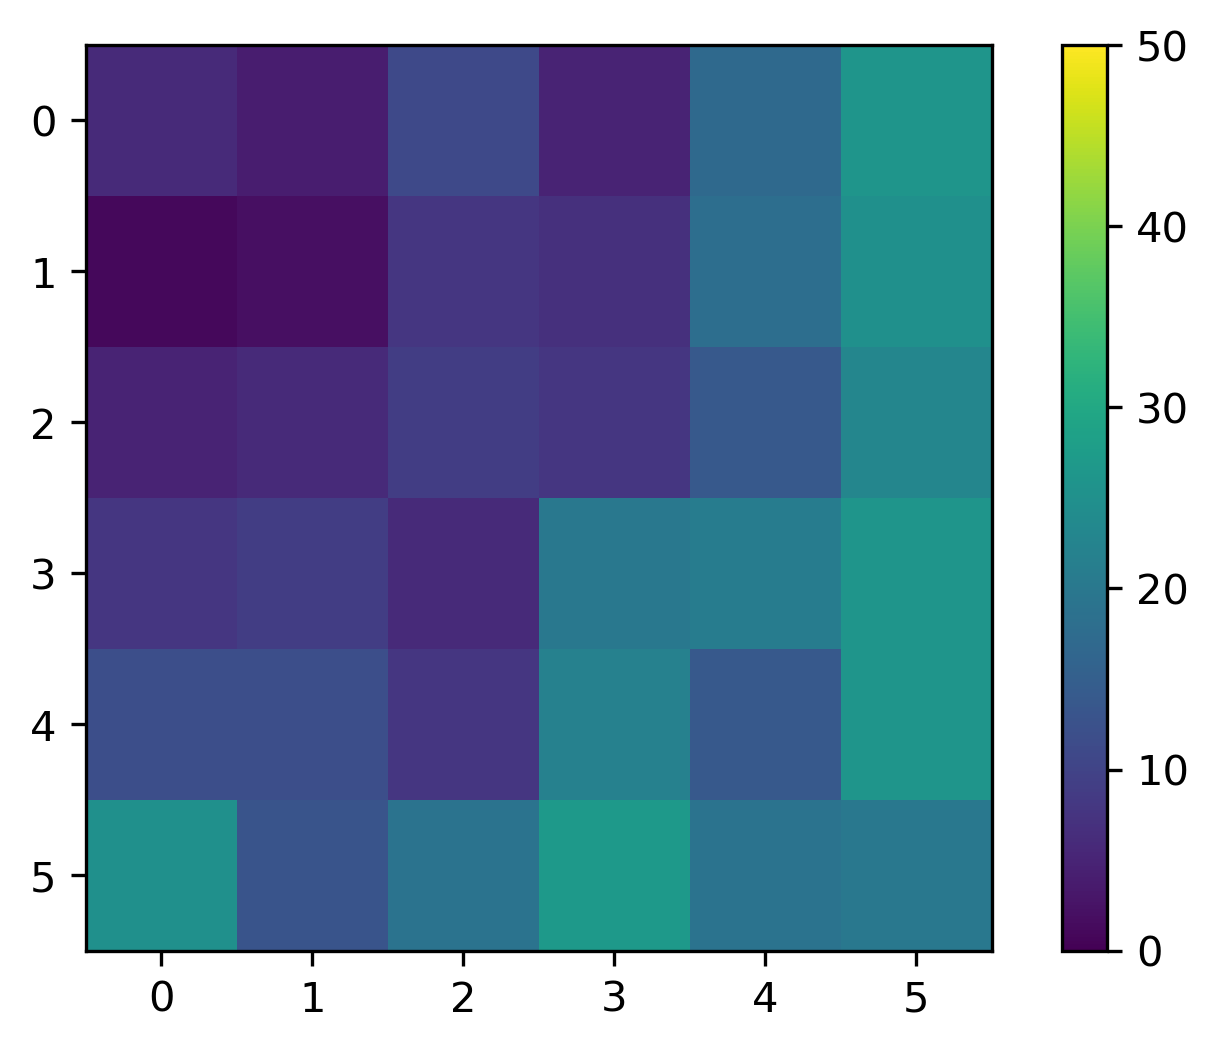

10500


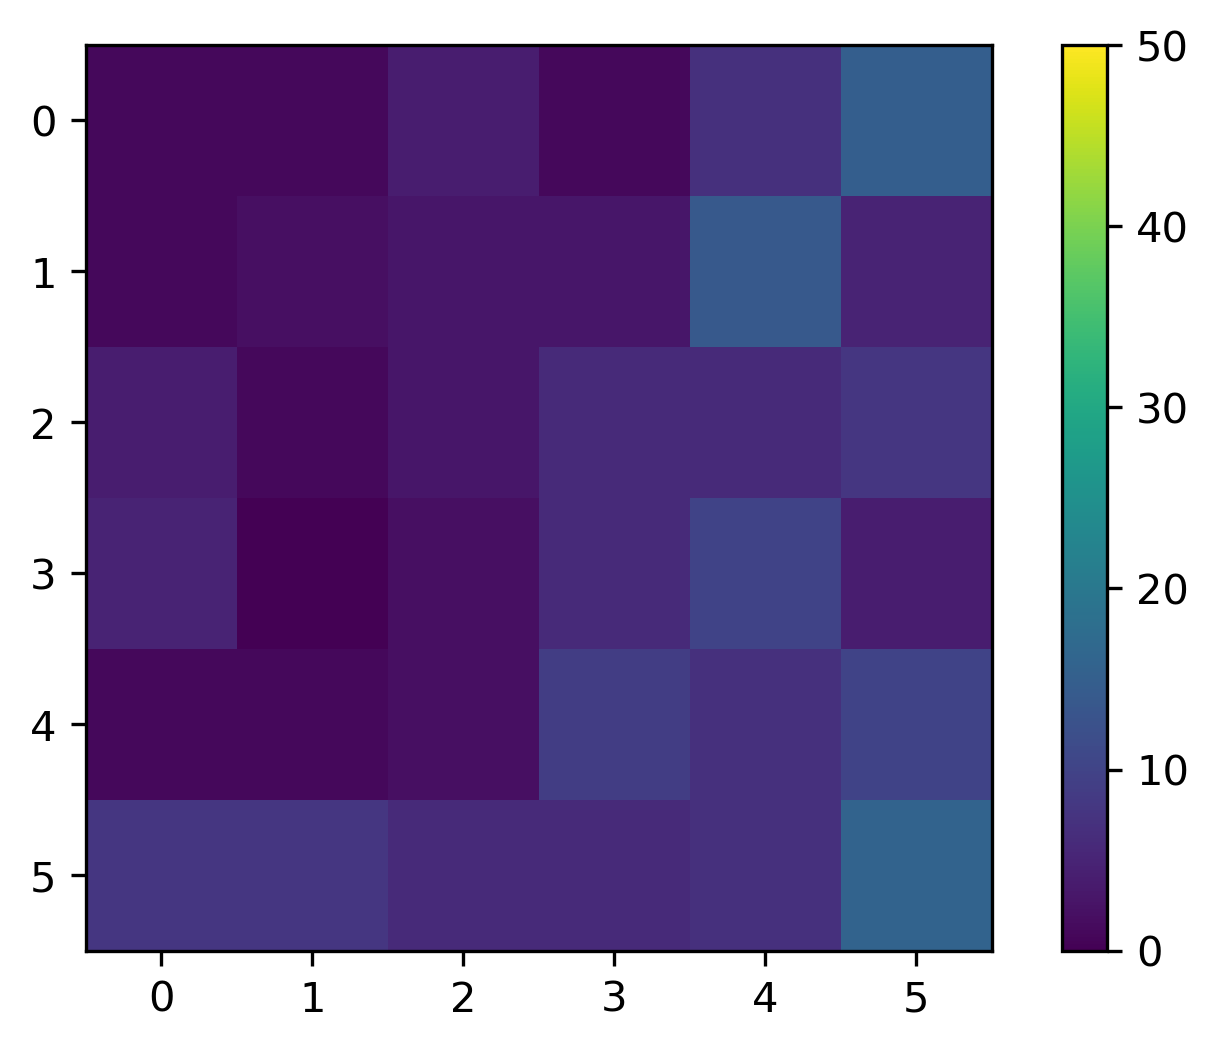

12250


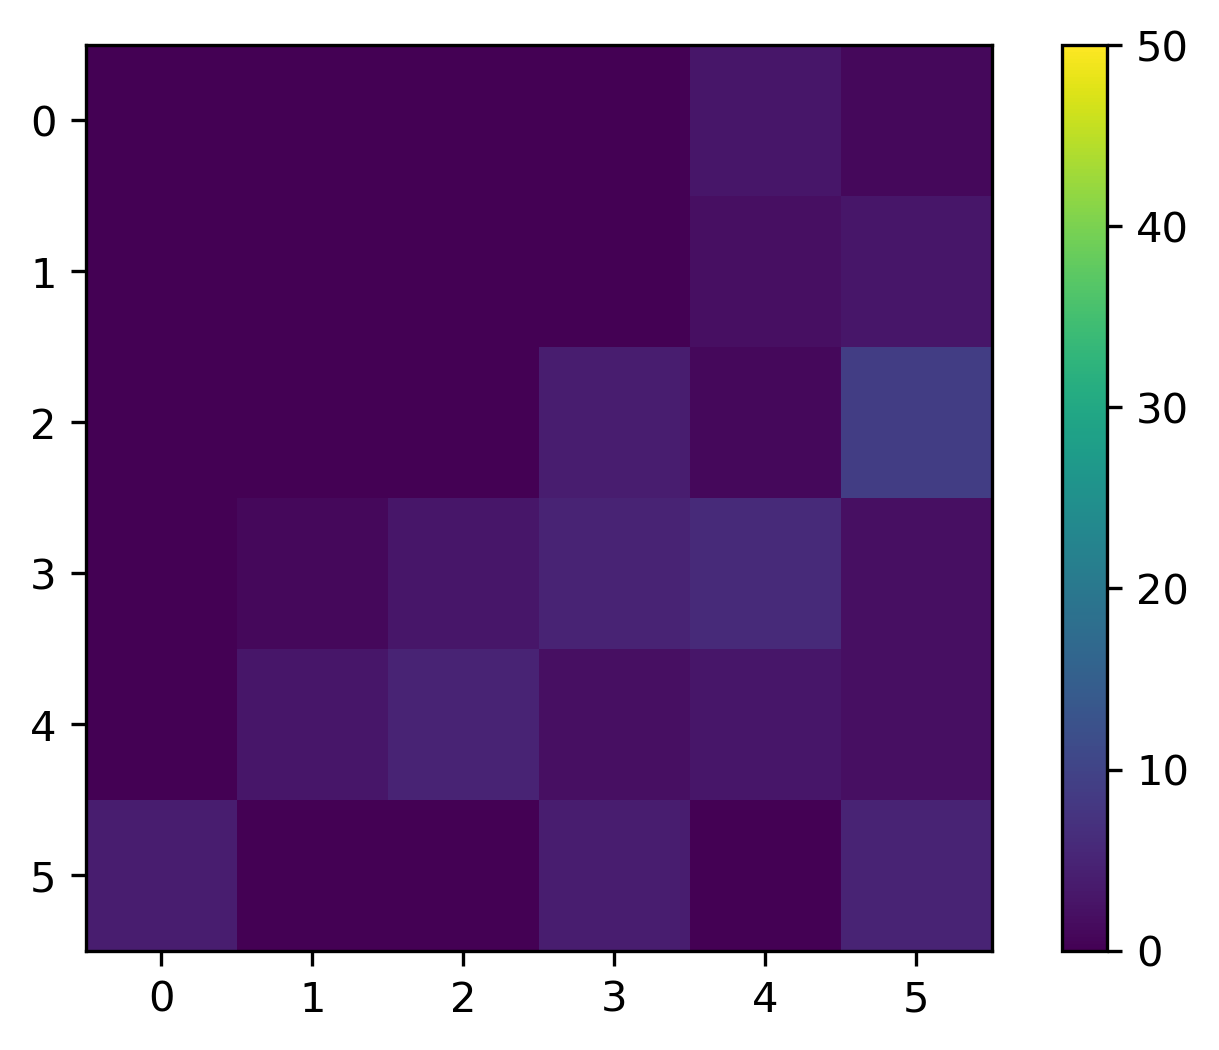

14000


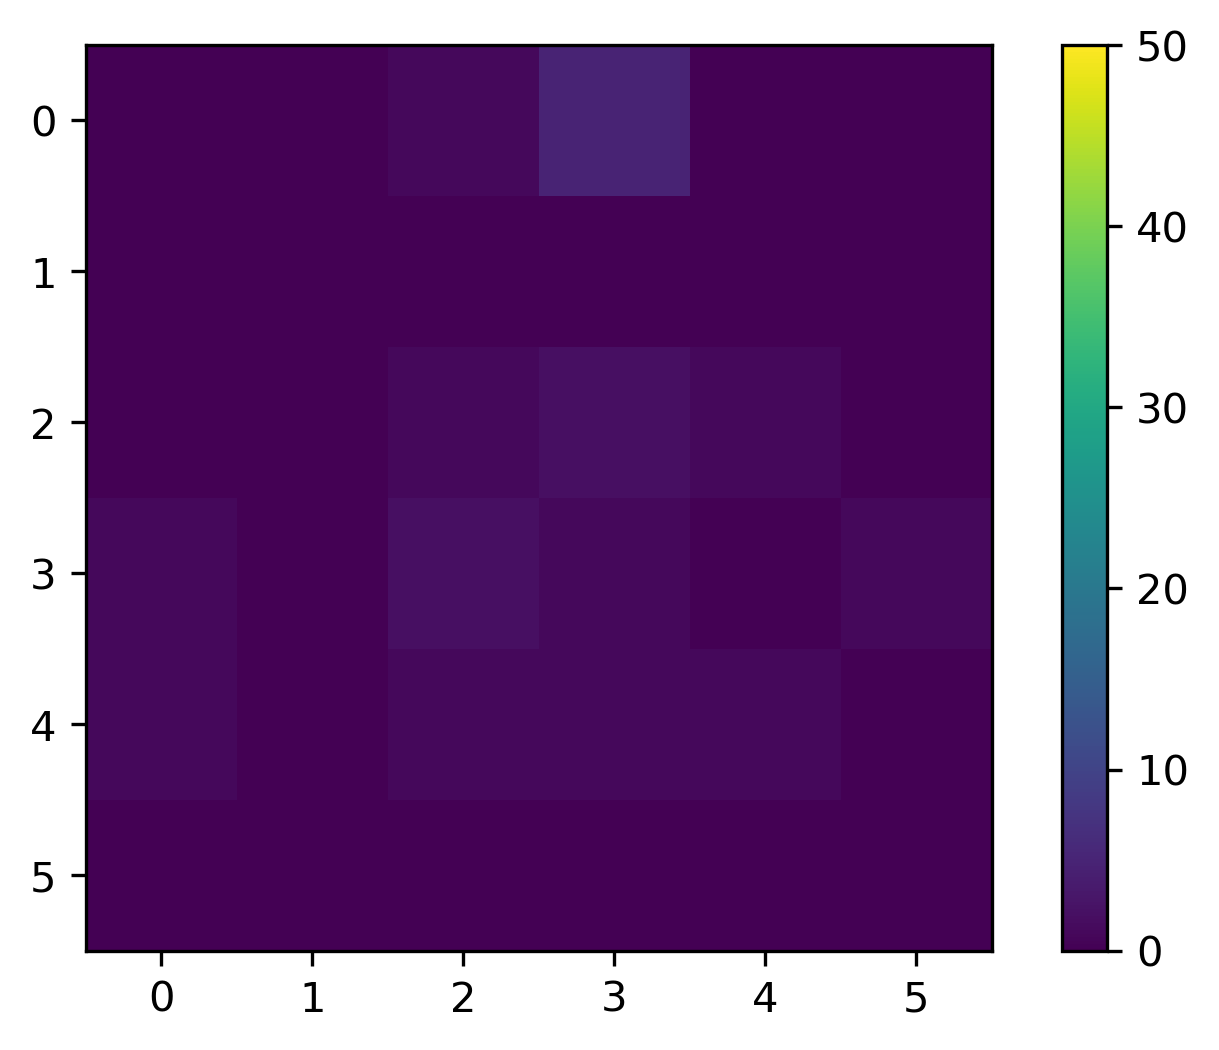

15750


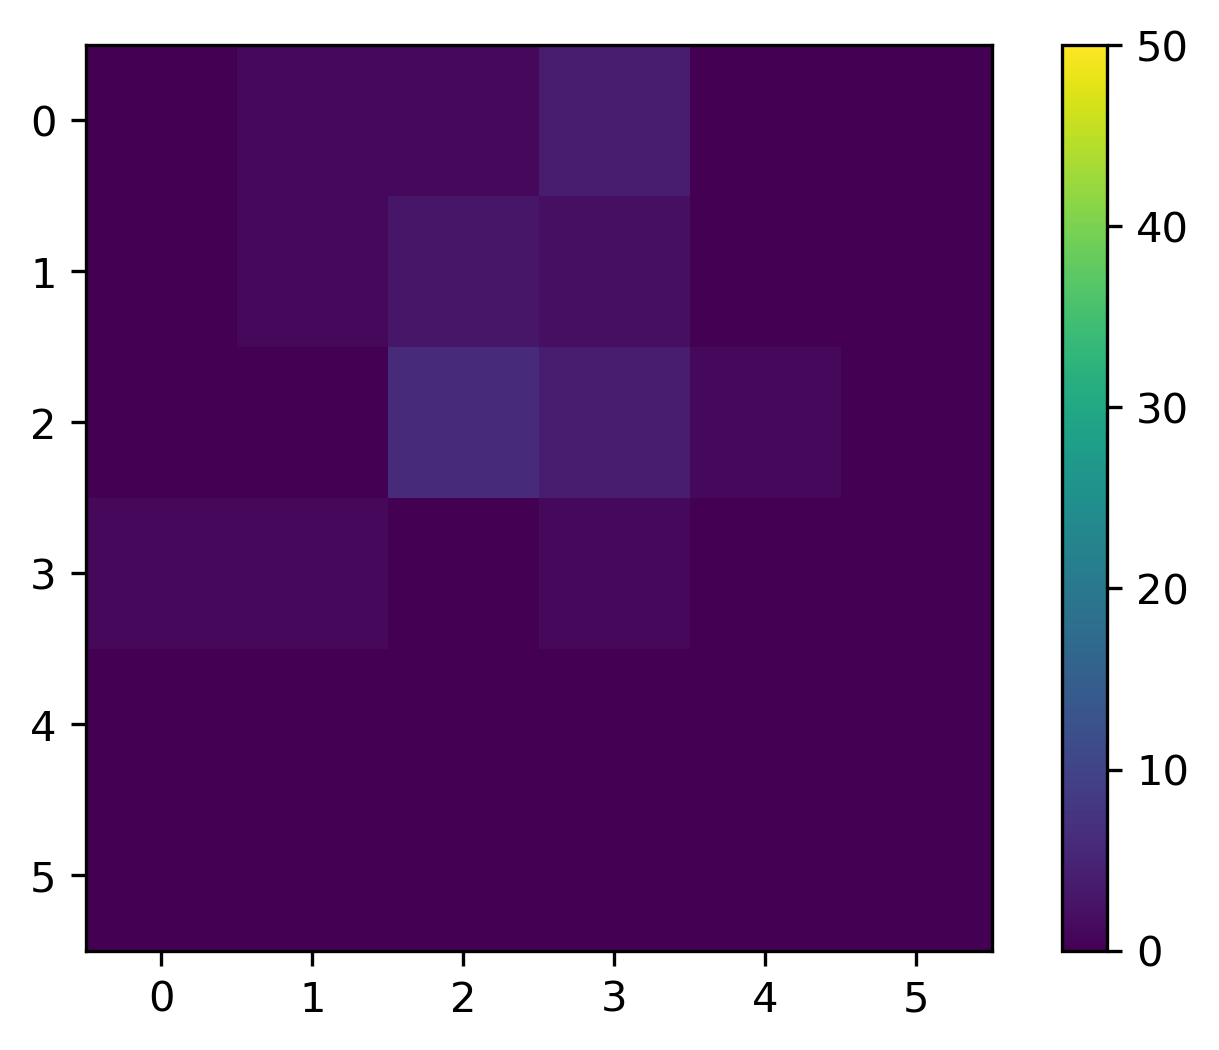

5.882877084315607

In [125]:
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


def get_neighbor_matrix(n, rho):
    """
    Get matrix with index rho for (i, j) and (j, i) if i and j are neigbors
    """

    # generate lattice of n x n and it's corresponding dict of dicts
    lattice = nx.generators.lattice.grid_graph([n, n])
    adjacency_dict = nx.convert.to_dict_of_dicts(lattice)

    # make adjacency matrix of lattice
    neighbor_matrix = []
    for i in range(n):
        for j in range(n):
            values = adjacency_dict.get((i, j))
            row_neighbor_matrix = []
            for k in range(n):
                for l in range(n):
                    if values.get((k, l)) == {}:
                        row_neighbor_matrix.append(rho)
                    else:
                        row_neighbor_matrix.append(0)
            neighbor_matrix.append(row_neighbor_matrix)

    return neighbor_matrix

def get_rho_matrix(n, rho):
    """
    Add ones to diagonal
    """
    neighbors = get_neighbor_matrix(n, rho)
    for i in range(n * n):
        for j in range(n * n):
            if i == j:
                neighbors[i][j] = 1

    return neighbors

def generate_populations(n, start_infection, X, Y, Z, N):
    """
    Generate a metapopulation with n subpopulations
    start_infection is the subpopulation in which the infection starts
    ---------
    IF NEEDED ALSO BETA, GAMMA AND MU CAN BE GIVEN TO POPS
    IF NEEDED X, Y, Z, N CAN BE LISTS SO POPSIZES AREN'T THE SAME
    """

    pop_list = []
    for i in range(n):
        if i == start_infection:
            pop = {"X" : [X], "Y" : [Y], "Z" : [Z], "N" : [N]}
        else:
            pop = {"X" : [N], "Y" : [0], "Z" : [Z], "N" : [N]}
        pop_list.append(pop)

    return pop_list

def metapop(pop_y, rho, beta, gamma, mu, t):

    rho_matrix = get_rho_matrix(int(math.sqrt(len(pop_y))), rho)

    time = 0
    time_list = [0]
    while time < t:

        rates = []
        i = 0
        for pop in pop_y:
            X = pop.get("X")[-1]
            Y = pop.get("Y")[-1]
            Z = pop.get("Z")[-1]
            N = pop.get("N")[-1]

            # calculate force of infection
            sum_ji = 0
            sum_ij = 0
            for j in range(len(pop_y)):
                sum_ji += rho_matrix[j][i]
                sum_ij += rho_matrix[i][j] * pop_y[j].get("Y")[-1]
            foi = beta * X * ((1 - sum_ji) * Y + sum_ij) / N

            rate_list = [mu * N, foi , gamma * Y, mu * X, mu * Y, mu * Z]
            for rate in rate_list:
                rates.append(rate)

            i += 1

        dt = []
        for i in range(len(rates)):
            u = np.random.uniform(0, 1)
            if rates[i] < 0.0001:
                dt.append(100000)
            else:
                dt.append(-np.log(u) / rates[i])

        next_event = dt.index(min(dt))
        pop_event = next_event // len(rate_list)

        i = 0
        for pop in pop_y:

            # get X, Y, Z, N
            X = pop.get("X")[-1]
            Y = pop.get("Y")[-1]
            Z = pop.get("Z")[-1]
            N = pop.get("N")[-1]

            # the population in which the event happens
            if i == pop_event:
                next_event = next_event % len(rate_list)

                if next_event == 0:
                    X = X + 1
                    N = N + 1

                elif next_event == 1:
                    X = X - 1
                    Y = Y + 1

                elif next_event == 2:
                    Y = Y - 1
                    Z = Z + 1

                elif next_event == 3:
                    X = X - 1
                    N = N -1

                elif next_event == 4:
                    Y = Y - 1
                    N = N - 1

                else:
                    Z = Z - 1
                    N = N - 1

            pop.get("X").append(X)
            pop.get("Y").append(Y)
            pop.get("Z").append(Z)
            pop.get("N").append(N)

            i += 1

        time += min(dt)
        time_list.append(time)

    return pop_y, time_list

def lattice_model(n, rho, t, start_infection, X, Y, Z, N, beta, gamma, mu):

    pops = generate_populations(n * n, start_infection, X, Y, Z, N)
    pops_over_time, time_list = metapop(pops, rho, beta, gamma, mu, t)

    # comment this when function is used for calculating speed of infection
    # generate plot with the course of infection
    for i in range(len(pops_over_time)):
        plt.plot(time_list, pops_over_time[i].get("Y"), label="pop " + str(i))

    plt.legend(bbox_to_anchor=(1.05, 1), ncol = 2, fontsize=15)
    plt.savefig("lattice_sizes.png", dpi=300)
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Number of infected individuals", fontsize=18)
    plt.show()

    # comment this when function is used for calculating speed of infection
    # generate heatmap
    time_steps = int(len(time_list) / 10)
    heat_plots = []
    for i in range(10):
        print(i * time_steps)
        heatmap(pops_over_time, int(i * time_steps), "_sizes_" + str(i))

    # calculate speed of infection
    furthest_pop = pops_over_time[-1].get("Y")
    for i in range(len(furthest_pop)):
        if furthest_pop[i] != 0:
            return time_list[i]


def heatmap(pops, t, name):
    n = int(math.sqrt(len(pops)))
    matrix = []
    for i in range(len(pops)):
        if i % n == 0:
            if i != 0:
                matrix.append(row)
            row = [pops[i].get("Y")[t]]
        else:
            row.append(pops[i].get("Y")[t])

    matrix.append(row)

    matrix = np.array(matrix)
    plt.imshow(matrix)
    plt.colorbar()
    plt.draw()
    plt.clim(0, 50)
    plt.savefig("heatmap_" + name + ".png", dpi=300)
    plt.show()


N = 100
Y = 10
Z = 0
X = N - Y - Z

beta = 3
gamma = 1
mu = 0.05

t = 25
rho = 0.1
grid_size = 6
start_infection = 0

lattice_model(grid_size, rho, t, start_infection, X, Y, Z, N, beta, gamma, mu)


In [126]:
def lattice_model(n, rho, t, start_infection, X, Y, Z, N, beta, gamma, mu):

    pops = generate_populations(n * n, start_infection, X, Y, Z, N)
    pops_over_time, time_list = metapop(pops, rho, beta, gamma, mu, t)

    # comment this when function is used for calculating speed of infection
    # generate plot with the course of infection
    for i in range(len(pops_over_time)):
        plt.plot(time_list, pops_over_time[i].get("Y"), label="pop " + str(i))

    plt.legend(bbox_to_anchor=(1.05, 1), ncol = 2, fontsize=15)
    plt.savefig("lattice_sizes.png", dpi=300)
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Number of infected individuals", fontsize=18)
    plt.show()

    # comment this when function is used for calculating speed of infection
    # generate heatmap
    time_steps = int(len(time_list) / 10)
    heat_plots = []
    for i in range(10):
        print(i * time_steps)
        heatmap(pops_over_time, int(i * time_steps), "_sizes_" + str(i))

    # calculate speed of infection
    furthest_pop = pops_over_time[-1].get("Y")
    for i in range(len(furthest_pop)):
        if furthest_pop[i] != 0:
            return time_list[i]
        
        
        
def speed_of_infection(n, rho_list):
    """
    Calculate the average of the speed of infection over n runs
    """
    averages = []
    for j in rho_list:
        distance_time = []
        for i in range(n):
            distance_time.append(lattice_model(grid_size, j, t, start_infection, X, Y, Z, N, beta, gamma, mu))
        average = sum(distance_time) / n
        averages.append(average)
    plt.plot(rho_list, averages)
    plt.xlabel("Rho", fontsize=12)
    plt.ylabel("Time (days)", fontsize=12)
    plt.show()

rho_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]



SyntaxError: invalid syntax (<ipython-input-126-3d0576c6f299>, line 29)